<a href="https://colab.research.google.com/github/diff94/STM_shorttext/blob/main/Data_Exploration_Keyness_BTM_neat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.getcwd() #current working directory
os.chdir("/content/gdrive/My Drive/Colab Notebooks/109-2正賢老師pypy/W13")

Mounted at /content/gdrive


In [ ]:
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
# font = {'family' : 'myfont',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

import matplotlib
# 下載台北思源黑體
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

# 將 font-family 設為台北思源黑體
matplotlib.rc('font', family = 'Taipei Sans TC Beta') #,size = 12

--2022-10-02 05:36:15--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.194.101, 172.217.194.139, 172.217.194.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.194.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5hcru2ag10dhbcqtj9d5bg2ok3qthter/1664688975000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=da351ee9-73de-4ae1-a69a-d186c5fa0722 [following]
--2022-10-02 05:36:16--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5hcru2ag10dhbcqtj9d5bg2ok3qthter/1664688975000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=da351ee9-73de-4ae1-a69a-d186c5fa0722
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.130.132, 2404:6800:4003:c01::84
Connecting to do

In [ ]:
! pip3 install -U ckip-transformers
from ckip_transformers.nlp import CkipWordSegmenter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 46.1 MB/s 
     |████████████████████████████████| 163 kB 70.9 MB/s 
     |████████████████████████████████| 6.6 MB 47.0 MB/s 


# Load Data and Data Exploration 


In [ ]:
# panda read csv as df 
import pandas as pd
tsaidf = pd.read_csv('tsaidf_nona_seg_norepeat.csv',encoding="utf-8") 
tsaidf = tsaidf.drop(['Unnamed: 0'], axis=1)
tsaidf

,title,lyricist,composer,lyrics,singer,clean,sen_text,length,text,sen_seg_text,seg_text
0,我是誰,梁錦興 / Jony J,MOURICE / KINGMING,作詞：梁錦興 / Jony J 作曲：MOURICE / KINGMING 習慣了黑的深邃...,tsai,： ： 習慣了黑的深邃 再野 也無畏 等星墜的餘輝 照亮誰 流放者的同類 藏著寂寞在防衛 ...,習慣了黑的深邃 再野 也無畏 等星墜的餘輝 照亮誰 流放者的同類 藏著寂寞在防衛 但溫柔總是...,643,習慣 黑 深邃 野 無畏 星墜 餘輝 照亮 誰 流放 者 同 類 藏 寂寞 防衛 溫柔 我 ...,習慣 了 黑 的 深邃\n再 野\n也 無畏\n等 星 墜 的 餘輝\n照亮 誰\n流放 者...,習慣 了 黑 的 深邃 再 野 也 無畏 等 星墜 的 餘輝 照亮 誰 流...
1,惡之必要,李維菁/剃刀蔣,剃刀蔣/陳星翰,不想是完美 崇拜我表面 不曾出惡言 受傷含冤 也從不抱怨 我曾以為 完美小姐 下個進階 只要...,tsai,不想是完美 崇拜我表面 不曾出惡言 受傷含冤 也從不抱怨 我曾以為 完美小姐 下個進階 只要...,不想是完美 崇拜我表面 不曾出惡言 受傷含冤 也從不抱怨 我曾以為 完美小姐 下個進階 只要...,625,想 完美 崇拜 我 表面 出 惡言 受傷 含冤 抱怨 我 以為 完美 小姐 下 個 進階 咬...,不 想 是 完美\n崇拜 我 表面\n不 曾 出 惡言\n受傷 含冤\n也 從不 抱怨\n我...,不 想 是 完美 崇拜 我 表面 不 曾 出 惡言 受傷 含冤 也 從不 抱...
2,玫瑰少年,阿信/蔡依林,剃刀蔣/蔡依林,誰把誰的靈魂 裝進誰的身體 誰把誰的身體 變成囹圄囚禁自己 亂世總是最 不缺耳語 哪種美麗會...,tsai,誰把誰的靈魂 裝進誰的身體 誰把誰的身體 變成囹圄囚禁自己 亂世總是最 不缺耳語 哪種美麗會...,誰把誰的靈魂 裝進誰的身體 誰把誰的身體 變成囹圄囚禁自己 亂世總是最 不缺耳語 哪種美麗會...,383,誰 誰 靈魂 裝進 誰 身體 誰 誰 身體 變成 囹圄 囚禁 自己 亂世 缺 耳語 哪 種 ...,誰 把 誰 的 靈魂\n裝進 誰 的 身體\n誰 把 誰 的 身體\n變成 囹圄 囚禁 自己...,誰 把 誰 的 靈魂 裝進 誰 的 身體 誰 把 誰 的 身體 變成 囹圄 囚禁...
3,怪美的,吳青峰,Rhys Fletcher/楊宥閒/陳星翰/蔡依林/Richard Craker,垂涎的邪惡 陪我長大 在軟爛中生長 社會營養 過去坑疤的 讓我站穩了 那些神醜的 評誰亂正的...,tsai,垂涎的邪惡 陪我長大 在軟爛中生長 社會營養 過去坑疤的 讓我站穩了 那些神醜的 評誰亂正的...,垂涎的邪惡 陪我長大 在軟爛中生長 社會營養 過去坑疤的 讓我站穩了 那些神醜的 評誰亂正的...,365,垂涎 邪惡 陪 我 長大 軟 爛 中 生長 社會 營養 過去 坑疤 讓 我 站穩 那些 神 ...,垂涎 的 邪惡\n陪 我 長大\n在 軟 爛 中 生長\n社會 營養\n過去 坑疤 的\n讓...,垂涎 的 邪惡 陪 我 長大 在 軟 爛 中 生長 社會 營養 過去 坑疤 ...
4,你也有今天,藍小邪,蔡依林/Hayley Michelle Aitken/Johan Gustafsson,被最愛的人 當作月拋的玩偶 被謊言 當作待宰的肥客 在最幸福的雲端 被一腳踹落 享受嗎 享受...,tsai,被最愛的人 當作月拋的玩偶 被謊言 當作待宰的肥客 在最幸福的雲端 被一腳踹落 享受嗎 享受...,被最愛的人 當作月拋的玩偶 被謊言 當作待宰的肥客 在最幸福的雲端 被一腳踹落 享受嗎 享受...,351,最 愛 人 當作 月拋 玩偶 謊言 當作 待 宰 肥客 幸福 雲端 一 腳 踹落 享受 享受...,被 最 愛 的 人\n當作 月拋 的 玩偶\n被 謊言\n當作 待 宰 的 肥客\n在 最 ...,被 最 愛 的 人 當作 月拋 的 玩偶 被 謊言 當作 待 宰 的 肥客 ...
...,...,...,...,...,...,...,...,...,...,...,...
301,一眼就看見,姚若龍,潘協慶,有你陪就算經過平常的街 心情都浪漫得像在海邊 最懶的走路的我也可以走好遠 你體貼的心勝過最美...,tsai,有你陪就算經過平常的街 心情都浪漫得像在海邊 最懶的走路的我也可以走好遠 你體貼的心勝過最美...,有你陪就算經過平常的街 心情都浪漫得像在海邊 最懶的走路的我也可以走好遠 你體貼的心勝過最美...,259,有 你 陪 經過 平常 街 心情 浪漫 像 海邊 懶 走路 我 走 遠 你 體貼 心 勝過 ...,有 你 陪 就算 經過 平常 的 街\n心情 都 浪漫 得 像 在 海邊\n最 懶 的 走路...,有 你 陪 就算 經過 平常 的 街 心情 都 浪漫 得 像 在 海邊 最 懶 的 ...
302,飄浮,毛毛,李偲菘,第一次聽見 你說愛我 愛變成檸檬 酸酸的 還不太成熟 有一點感動 挾著冒險的念頭 想跟你 踏...,tsai,第一次聽見 你說愛我 愛變成檸檬 酸酸的 還不太成熟 有一點感動 挾著冒險的念頭 想跟你 踏...,第一次聽見 你說愛我 愛變成檸檬 酸酸的 還不太成熟 有一點感動 挾著冒險的念頭 想跟你 踏...,379,第一 次 聽見 你 說 愛 我 愛 變成 檸檬 酸酸 成熟 有 一點 感動 挾 冒險 念頭 ...,第一 次 聽見\n你 說 愛 我\n愛 變成 檸檬\n酸酸 的\n還 不 太 成熟\n有一點...,第一 次 聽見 你 說 愛 我 愛 變成 檸檬 酸酸 的 還 不 太 成熟 ...
303,我覺得很好,姚若龍,靳鐵章,冬天的陽光 我覺得很好啊 不會像個烤箱 像個溫暖懷抱 有一種心情 慢慢在燃燒 覺得 再冷也能...,tsai,冬天的陽光 我覺得很好啊 不會像個烤箱 像個溫暖懷抱 有一種心情 慢慢在燃燒 覺得 再冷也能...,冬天的陽光 我覺得很好啊 不會像個烤箱 像個溫暖懷抱 有一種心情 慢慢在燃燒 覺得 再冷也能...,244,冬天 陽光 我 覺得 好 像 烤箱 像 溫暖 懷抱 有 一 種 心情 慢慢 燃燒 覺得 冷 ...,冬天 的 陽光\n我 覺得 很 好 啊\n不會 像 個 烤箱\n像 個 溫暖 懷抱\n有 一...,冬天 的 陽光 我 覺得 很 好 啊 不會 像 個 烤箱 像 個 溫暖 懷抱 ...
304,今天妳要嫁給我,陶<U+5586>/娃娃,陶<U+5586>,陶：春暖的花開 帶走冬天的感傷 微風吹來浪漫的氣息 每一首情歌 忽然充滿意義 我就在此刻...,tsai,陶：春暖的花開 帶走冬天的感傷 微風吹來浪漫的氣息 每一首情歌 忽然充滿意義 我就在此刻...,陶 春暖的花開 帶走冬天的感傷 微風吹來浪漫的氣息 每一首情歌 忽然充滿意義 我就在此刻突然...,533,陶 春暖 花 開 帶走 冬天 感傷 微風 吹來 浪漫 氣息 每 一 首 情歌 充滿 意義 ...,陶\n春暖 的 花 開\n帶走 冬天 的 感傷\n微風 吹來 浪漫 的 氣息\n每 一 首 ...,陶 春暖 的 花 開 帶走 冬天 的 感傷 微風 吹來 浪漫 的 氣息 每 一...


In [ ]:
# panda read csv as df 
import pandas as pd
chendf = pd.read_csv('chendf_nona_seg_norepeat.csv',encoding="utf-8") #122 #但有兩首因為雖然同歌名與歌詞但字數有點不一樣所以仍被保留
chendf = chendf.drop(['Unnamed: 0'], axis=1)
chendf


,title,lyricist,composer,lyrics,singer,clean,sen_text,length,text,sen_seg_text,seg_text
0,完整的我,陳綺貞、鬼卞,陳綺貞、鬼卞,作詞：陳綺貞、鬼卞 作曲：陳綺貞、鬼卞 用一頁白紙 描繪我這 滿身創傷或 美麗的模樣 讓刀...,chen,： ： 用一頁白紙 描繪我這 滿身創傷或 美麗的模樣 讓刀子刻下 歲月一場 雕塑了此生 殘...,用一頁白紙 描繪我這 滿身創傷或 美麗的模樣 讓刀子刻下 歲月一場 雕塑了此生 殘缺與陰陽 ...,565,一 頁 白紙 描繪 我 這 滿 身 創傷 美麗 模樣 讓 刀子 刻下 歲月 一 場 雕塑 此...,用 一 頁 白紙\n描繪 我 這\n滿 身 創傷 或\n美麗 的 模樣\n讓 刀子 刻下\n...,用 一 頁 白紙 描繪 我 這 滿 身 創傷 或 美麗 的 模樣 讓 刀子 ...
1,傷害,陳綺貞,陳綺貞,你的眼睛 告訴我 你不想要這種美 你的厭倦 告訴我 我只能是你的傀儡 沒有誰能躲開 這種傷...,chen,你的眼睛 告訴我 你不想要這種美 你的厭倦 告訴我 我只能是你的傀儡 沒有誰能躲開 這種傷...,你的眼睛 告訴我 你不想要這種美 你的厭倦 告訴我 我只能是你的傀儡 沒有誰能躲開 這種傷害...,197,你 眼睛 告訴 我 你 想要 這 種 美 你 厭倦 告訴 我 我 你 傀儡 沒有 誰 躲開 ...,你 的 眼睛\n告訴 我\n你 不 想要 這 種 美\n你 的 厭倦\n告訴 我\n我 只 ...,你 的 眼睛 告訴 我 你 不 想要 這 種 美 你 的 厭倦 告訴 我 ...
2,小船,陳綺貞,陳綺貞,一條小船在天空 決定再航行兩分鐘 兩個光年再回頭 回頭看見你在等我 我們沿著河邊走 一條河...,chen,一條小船在天空 決定再航行兩分鐘 兩個光年再回頭 回頭看見你在等我 我們沿著河邊走 一條河...,一條小船在天空 決定再航行兩分鐘 兩個光年再回頭 回頭看見你在等我 我們沿著河邊走 一條河從...,526,一 條 小 船 天空 決定 航行 兩 分鐘 兩 個 光年 回頭 回頭 看見 你 等 我 我們...,一 條 小 船 在 天空\n決定 再 航行 兩 分鐘\n兩 個 光年 再 回頭\n回頭 看見...,一 條 小 船 在 天空 決定 再 航行 兩 分鐘 兩 個 光年 再 回頭 回頭...
3,殘缺的彩虹,陳綺貞,陳綺貞,這一次 我不想要 一個人走 回去的路 總是背對彩虹 沒有你 我是殘缺的彩虹 失去一個最重要的...,chen,這一次 我不想要 一個人走 回去的路 總是背對彩虹 沒有你 我是殘缺的彩虹 失去一個最重要的...,這一次 我不想要 一個人走 回去的路 總是背對彩虹 沒有你 我是殘缺的彩虹 失去一個最重要的...,270,這 一 次 我 想要 一 個 人 走 回去 路 背對 彩虹 沒有 你 我 殘缺 彩虹 失去 ...,這 一 次\n我 不 想要\n一 個 人 走\n回去 的 路\n總是 背對 彩虹\n沒有 你...,這 一 次 我 不 想要 一 個 人 走 回去 的 路 總是 背對 彩虹 ...
4,台北某個地方,陳綺貞,陳綺貞,曬乾你的襯衫 收起你的餐盤 呼吸這個早晨你留下的味道 清晨第一班列車 開往同一個地方 那一...,chen,曬乾你的襯衫 收起你的餐盤 呼吸這個早晨你留下的味道 清晨第一班列車 開往同一個地方 那一...,曬乾你的襯衫 收起你的餐盤 呼吸這個早晨你留下的味道 清晨第一班列車 開往同一個地方 那一次...,324,曬乾 你 襯衫 收 你 餐盤 呼吸 這 個 早晨 你 留下 味道 清晨 第一 班 列車 開 ...,曬乾 你 的 襯衫\n收起 你 的 餐盤\n呼吸 這 個 早晨 你 留下 的 味道\n清晨 ...,曬乾 你 的 襯衫 收起 你 的 餐盤 呼吸 這 個 早晨 你 留下 的 味道 ...
...,...,...,...,...,...,...,...,...,...,...,...
117,歌尾巴,陳綺貞,陳綺貞,孤獨是冬夜下的雨 孤獨是清晨的嘆息 孤獨是一首歌的名字 讓我輕輕呼喚你 讓我靜靜閉上眼睛...,chen,孤獨是冬夜下的雨 孤獨是清晨的嘆息 孤獨是一首歌的名字 讓我輕輕呼喚你 讓我靜靜閉上眼睛...,孤獨是冬夜下的雨 孤獨是清晨的嘆息 孤獨是一首歌的名字 讓我輕輕呼喚你 讓我靜靜閉上眼睛 在...,150,孤獨 冬夜 下 雨 孤獨 清晨 嘆息 孤獨 一 首 歌 名字 讓 我 輕輕 呼喚 你 讓 我...,孤獨 是 冬夜 下 的 雨\n孤獨 是 清晨 的 嘆息\n孤獨 是 一 首 歌 的 名字\n...,孤獨 是 冬夜 下 的 雨 孤獨 是 清晨 的 嘆息 孤獨 是 一 首 歌 的 名字...
118,倔強愛情的勝利,陳綺貞,NaN,我們才有了共同的話題 我們的晚餐才能再繼續 這就是我們所謂的友誼 是誰容許你侵犯我的回憶 ...,chen,我們才有了共同的話題 我們的晚餐才能再繼續 這就是我們所謂的友誼 是誰容許你侵犯我的回憶 ...,我們才有了共同的話題 我們的晚餐才能再繼續 這就是我們所謂的友誼 是誰容許你侵犯我的回憶 亂...,163,我們 有 話題 我們 晚餐 繼續 這 我們 所謂 友誼 誰 容許 你 侵犯 我 回憶 亂 翻...,我們 才 有 了 共同 的 話題\n我們 的 晚餐 才 能 再 繼續\n這 就 是 我們 所...,我們 才 有 了 共同 的 話題 我們 的 晚餐 才 能 再 繼續 這 就 是 我們...
119,漂著(善變的你),陳綺貞,陳綺貞,你送給我的信大部份我都看不懂 你牽著我的手 我已經痲痺沒感覺 就這麼漂著 漂著 漂著 就這麼...,chen,你送給我的信大部份我都看不懂 你牽著我的手 我已經痲痺沒感覺 就這麼漂著 漂著 漂著 就這麼...,你送給我的信大部份我都看不懂 你牽著我的手 我已經痲痺沒感覺 就這麼漂著 漂著 漂著 就這麼...,222,你 送給 我 信 大部份 我 看 懂 你 牽 我 手 我 痲痺 沒 感覺 漂 漂 漂 漂 漂...,你 送給 我 的 信 大部份 我 都 看 不 懂\n你 牽 著 我 的 手\n我 已經 痲痺...,你 送給 我 的 信 大部份 我 都 看 不 懂 你 牽 著 我 的 手 我 已經 ...
120,慌心假期,陳綺貞,陳綺貞,我一個人到陌生的地方 把所有的旅費都花光 在人來人往的車站廣場 逛一逛 在街上閒晃看看別的...,chen,我一個人到陌生的地方 把所有的旅費都花光 在人來人往的車站廣場 逛一逛 在街上閒晃看看別的...,我一個人到陌生的地方 把所有的旅費都花光 在人來人往的車站廣場 逛一逛 在街上閒晃看看別的男...,199,我 一 個 人 到 陌生 地方 所有 旅費 花光 人來人往 車站 廣場 逛 逛 街 上 閒晃...,我 一 個 人 到 陌生 的 地方\n把 所有 的 旅費 都 花光\n在 人來人往 的 車站...,我 一 個 人 到 陌生 的 地方 把 所有 的 旅費 都 花光 在 人來人往 的 ...


In [ ]:
tcdf = tsaidf.append(chendf)
tcdf

,title,lyricist,composer,lyrics,singer,clean,sen_text,length,text,sen_seg_text,seg_text
0,我是誰,梁錦興 / Jony J,MOURICE / KINGMING,作詞：梁錦興 / Jony J 作曲：MOURICE / KINGMING 習慣了黑的深邃...,tsai,： ： 習慣了黑的深邃 再野 也無畏 等星墜的餘輝 照亮誰 流放者的同類 藏著寂寞在防衛 ...,習慣了黑的深邃 再野 也無畏 等星墜的餘輝 照亮誰 流放者的同類 藏著寂寞在防衛 但溫柔總是...,643,習慣 黑 深邃 野 無畏 星墜 餘輝 照亮 誰 流放 者 同 類 藏 寂寞 防衛 溫柔 我 ...,習慣 了 黑 的 深邃\n再 野\n也 無畏\n等 星 墜 的 餘輝\n照亮 誰\n流放 者...,習慣 了 黑 的 深邃 再 野 也 無畏 等 星墜 的 餘輝 照亮 誰 流...
1,惡之必要,李維菁/剃刀蔣,剃刀蔣/陳星翰,不想是完美 崇拜我表面 不曾出惡言 受傷含冤 也從不抱怨 我曾以為 完美小姐 下個進階 只要...,tsai,不想是完美 崇拜我表面 不曾出惡言 受傷含冤 也從不抱怨 我曾以為 完美小姐 下個進階 只要...,不想是完美 崇拜我表面 不曾出惡言 受傷含冤 也從不抱怨 我曾以為 完美小姐 下個進階 只要...,625,想 完美 崇拜 我 表面 出 惡言 受傷 含冤 抱怨 我 以為 完美 小姐 下 個 進階 咬...,不 想 是 完美\n崇拜 我 表面\n不 曾 出 惡言\n受傷 含冤\n也 從不 抱怨\n我...,不 想 是 完美 崇拜 我 表面 不 曾 出 惡言 受傷 含冤 也 從不 抱...
2,玫瑰少年,阿信/蔡依林,剃刀蔣/蔡依林,誰把誰的靈魂 裝進誰的身體 誰把誰的身體 變成囹圄囚禁自己 亂世總是最 不缺耳語 哪種美麗會...,tsai,誰把誰的靈魂 裝進誰的身體 誰把誰的身體 變成囹圄囚禁自己 亂世總是最 不缺耳語 哪種美麗會...,誰把誰的靈魂 裝進誰的身體 誰把誰的身體 變成囹圄囚禁自己 亂世總是最 不缺耳語 哪種美麗會...,383,誰 誰 靈魂 裝進 誰 身體 誰 誰 身體 變成 囹圄 囚禁 自己 亂世 缺 耳語 哪 種 ...,誰 把 誰 的 靈魂\n裝進 誰 的 身體\n誰 把 誰 的 身體\n變成 囹圄 囚禁 自己...,誰 把 誰 的 靈魂 裝進 誰 的 身體 誰 把 誰 的 身體 變成 囹圄 囚禁...
3,怪美的,吳青峰,Rhys Fletcher/楊宥閒/陳星翰/蔡依林/Richard Craker,垂涎的邪惡 陪我長大 在軟爛中生長 社會營養 過去坑疤的 讓我站穩了 那些神醜的 評誰亂正的...,tsai,垂涎的邪惡 陪我長大 在軟爛中生長 社會營養 過去坑疤的 讓我站穩了 那些神醜的 評誰亂正的...,垂涎的邪惡 陪我長大 在軟爛中生長 社會營養 過去坑疤的 讓我站穩了 那些神醜的 評誰亂正的...,365,垂涎 邪惡 陪 我 長大 軟 爛 中 生長 社會 營養 過去 坑疤 讓 我 站穩 那些 神 ...,垂涎 的 邪惡\n陪 我 長大\n在 軟 爛 中 生長\n社會 營養\n過去 坑疤 的\n讓...,垂涎 的 邪惡 陪 我 長大 在 軟 爛 中 生長 社會 營養 過去 坑疤 ...
4,你也有今天,藍小邪,蔡依林/Hayley Michelle Aitken/Johan Gustafsson,被最愛的人 當作月拋的玩偶 被謊言 當作待宰的肥客 在最幸福的雲端 被一腳踹落 享受嗎 享受...,tsai,被最愛的人 當作月拋的玩偶 被謊言 當作待宰的肥客 在最幸福的雲端 被一腳踹落 享受嗎 享受...,被最愛的人 當作月拋的玩偶 被謊言 當作待宰的肥客 在最幸福的雲端 被一腳踹落 享受嗎 享受...,351,最 愛 人 當作 月拋 玩偶 謊言 當作 待 宰 肥客 幸福 雲端 一 腳 踹落 享受 享受...,被 最 愛 的 人\n當作 月拋 的 玩偶\n被 謊言\n當作 待 宰 的 肥客\n在 最 ...,被 最 愛 的 人 當作 月拋 的 玩偶 被 謊言 當作 待 宰 的 肥客 ...
...,...,...,...,...,...,...,...,...,...,...,...
117,歌尾巴,陳綺貞,陳綺貞,孤獨是冬夜下的雨 孤獨是清晨的嘆息 孤獨是一首歌的名字 讓我輕輕呼喚你 讓我靜靜閉上眼睛...,chen,孤獨是冬夜下的雨 孤獨是清晨的嘆息 孤獨是一首歌的名字 讓我輕輕呼喚你 讓我靜靜閉上眼睛...,孤獨是冬夜下的雨 孤獨是清晨的嘆息 孤獨是一首歌的名字 讓我輕輕呼喚你 讓我靜靜閉上眼睛 在...,150,孤獨 冬夜 下 雨 孤獨 清晨 嘆息 孤獨 一 首 歌 名字 讓 我 輕輕 呼喚 你 讓 我...,孤獨 是 冬夜 下 的 雨\n孤獨 是 清晨 的 嘆息\n孤獨 是 一 首 歌 的 名字\n...,孤獨 是 冬夜 下 的 雨 孤獨 是 清晨 的 嘆息 孤獨 是 一 首 歌 的 名字...
118,倔強愛情的勝利,陳綺貞,NaN,我們才有了共同的話題 我們的晚餐才能再繼續 這就是我們所謂的友誼 是誰容許你侵犯我的回憶 ...,chen,我們才有了共同的話題 我們的晚餐才能再繼續 這就是我們所謂的友誼 是誰容許你侵犯我的回憶 ...,我們才有了共同的話題 我們的晚餐才能再繼續 這就是我們所謂的友誼 是誰容許你侵犯我的回憶 亂...,163,我們 有 話題 我們 晚餐 繼續 這 我們 所謂 友誼 誰 容許 你 侵犯 我 回憶 亂 翻...,我們 才 有 了 共同 的 話題\n我們 的 晚餐 才 能 再 繼續\n這 就 是 我們 所...,我們 才 有 了 共同 的 話題 我們 的 晚餐 才 能 再 繼續 這 就 是 我們...
119,漂著(善變的你),陳綺貞,陳綺貞,你送給我的信大部份我都看不懂 你牽著我的手 我已經痲痺沒感覺 就這麼漂著 漂著 漂著 就這麼...,chen,你送給我的信大部份我都看不懂 你牽著我的手 我已經痲痺沒感覺 就這麼漂著 漂著 漂著 就這麼...,你送給我的信大部份我都看不懂 你牽著我的手 我已經痲痺沒感覺 就這麼漂著 漂著 漂著 就這麼...,222,你 送給 我 信 大部份 我 看 懂 你 牽 我 手 我 痲痺 沒 感覺 漂 漂 漂 漂 漂...,你 送給 我 的 信 大部份 我 都 看 不 懂\n你 牽 著 我 的 手\n我 已經 痲痺...,你 送給 我 的 信 大部份 我 都 看 不 懂 你 牽 著 我 的 手 我 已經 ...
120,慌心假期,陳綺貞,陳綺貞,我一個人到陌生的地方 把所有的旅費都花光 在人來人往的車站廣場 逛一逛 在街上閒晃看看別的...,chen,我一個人到陌生的地方 把所有的旅費都花光 在人來人往的車站廣場 逛一逛 在街上閒晃看看別的...,我一個人到陌生的地方 把所有的旅費都花光 在人來人往的車站廣場 逛一逛 在街上閒晃看看別的男...,199,我 一 個 人 到 陌生 地方 所有 旅費 花光 人來人往 車站 廣場 逛 逛 街 上 閒晃...,我 一 個 人 到 陌生 的 地方\n把 所有 的 旅費 都 花光\n在 人來人往 的 車站...,我 一 個 人 到 陌生 的 地方 把 所有 的 旅費 都 花光 在 人來人往 的 ...


##Data Exploration_Lyric word freq_V&N in column: text

In [ ]:
voc_list = [i.split() for i in chendf.text] 
voc =[j for i in voc_list for j in i]
 
import re
from collections import Counter
frequencies = Counter(word for word in voc)
voc_sort = sorted(frequencies.items(), key=lambda item: (-item[1])) 
from pandas import DataFrame
voc_df = DataFrame (voc_sort,columns=['Word',"Frequency"])
voc_df['Relative Frequency'] = voc_df['Frequency']/sum(voc_df['Frequency'])
voc_df_c = voc_df.loc[voc_df['Frequency'] >= 1  ] 
voc_df_c['Singer'] = "Chen"
voc_df_c

,Word,Frequency,Relative Frequency,Singer
0,我,1229,0.100187,Chen
1,你,1011,0.082416,Chen
2,一,342,0.027880,Chen
3,讓,158,0.012880,Chen
4,愛,151,0.012309,Chen
...,...,...,...,...
2287,酒館,1,0.000082,Chen
2288,門城,1,0.000082,Chen
2289,偷走,1,0.000082,Chen
2290,盼曦,1,0.000082,Chen


In [ ]:
voc_list = [i.split() for i in tsaidf.text] 
voc =[j for i in voc_list for j in i] 
import re
from collections import Counter
frequencies = Counter(word for word in voc)
voc_sort = sorted(frequencies.items(), key=lambda item: (-item[1])) 
from pandas import DataFrame
voc_df = DataFrame (voc_sort,columns=['Word',"Frequency"])
voc_df['Relative Frequency'] = voc_df['Frequency']/sum(voc_df['Frequency'])
voc_df_t = voc_df.loc[voc_df['Frequency'] >= 1  ] 
voc_df_t['Singer'] = "Tsai"
voc_df_t

,Word,Frequency,Relative Frequency,Singer
0,我,2849,0.067266,Tsai
1,你,2525,0.059617,Tsai
2,愛,1089,0.025712,Tsai
3,一,719,0.016976,Tsai
4,說,412,0.009728,Tsai
...,...,...,...,...
5201,綠草,1,0.000024,Tsai
5202,飄散,1,0.000024,Tsai
5203,移動,1,0.000024,Tsai
5204,何去何從,1,0.000024,Tsai


In [ ]:
vocdf = voc_df_t[:20].append(voc_df_c[:20])
vocdf = vocdf.sort_values(by=['Relative Frequency'],ascending=False)
vocdf

,Word,Frequency,Relative Frequency,Singer
0,我,1229,0.100187,Chen
1,你,1011,0.082416,Chen
0,我,2849,0.067266,Tsai
1,你,2525,0.059617,Tsai
2,一,342,0.027880,Chen
2,愛,1089,0.025712,Tsai
3,一,719,0.016976,Tsai
3,讓,158,0.012880,Chen
4,愛,151,0.012309,Chen
5,說,123,0.010027,Chen


In [ ]:
import plotly.express as px
fig = px.bar(vocdf, x='Word', y='Relative Frequency',   color="Singer", orientation='v')  
fig.update_layout(title_text='Top 20 Words in Tsai and in Chen', title_x=0.5)
fig.show()

##Data Exploration__Lyricist Distribution

In [ ]:
lyricist = [i for i in chendf.lyricist] 
import re
from collections import Counter
frequencies = Counter(word for word in lyricist)
lyricist_sort = sorted(frequencies.items(), key=lambda item: (-item[1])) 
from pandas import DataFrame
lyricist_df = DataFrame (lyricist_sort,columns=['Lyricist',"Freq"])
lyricist_df['Relative Frequency'] = lyricist_df['Freq']/sum(lyricist_df['Freq'])
lyricist_df_c = lyricist_df.loc[lyricist_df['Freq'] >= 1  ] 
lyricist_df_c['Singer']='Chen'
lyricist_df_c

,Lyricist,Freq,Relative Frequency,Singer
0,陳綺貞,108,0.885246,Chen
1,李格弟,2,0.016393,Chen
2,陳綺貞、鬼卞,1,0.008197,Chen
3,韓寒,1,0.008197,Chen
4,夏宇,1,0.008197,Chen
5,鴻鴻,1,0.008197,Chen
6,吳佳穎,1,0.008197,Chen
7,曲培芷/孫詩雯,1,0.008197,Chen
8,廖叔輔/可樂王(Cola King),1,0.008197,Chen
9,李叔同/可樂王(Cola King),1,0.008197,Chen


In [ ]:
lyricist = [i for i in tsaidf.lyricist] 
import re
from collections import Counter
frequencies = Counter(word for word in lyricist)
lyricist_sort = sorted(frequencies.items(), key=lambda item: (-item[1])) 
from pandas import DataFrame
lyricist_df = DataFrame (lyricist_sort,columns=['Lyricist',"Freq"])
lyricist_df['Relative Frequency'] = lyricist_df['Freq']/sum(lyricist_df['Freq'])
lyricist_df_t = lyricist_df.loc[lyricist_df['Freq'] >= 1  ]
lyricist_df_t['Singer']='Tsai'
lyricist_df_t

,Lyricist,Freq,Relative Frequency,Singer
0,NaN,53,0.173203,Tsai
1,陳鎮川,31,0.101307,Tsai
2,嚴云農,14,0.045752,Tsai
3,李焯雄,14,0.045752,Tsai
4,蔡依林,10,0.032680,Tsai
...,...,...,...,...
105,Persson/Svensson,1,0.003268,Tsai
106,Don Schlitz / Paul Overstreet,1,0.003268,Tsai
107,管啟源/李焯雄,1,0.003268,Tsai
108,姚謙,1,0.003268,Tsai


In [ ]:
lyricist_df_t.Lyricist[lyricist_df_t['Lyricist'].str.contains('娃', na=False)] = "陶喆/娃娃"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
contain_values = lyricist_df_t[lyricist_df_t['Lyricist'].str.contains('娃', na=False)]
print(contain_values)

   Lyricist  Freq  Relative Frequency Singer
20    陶喆/娃娃     3            0.009804   Tsai


In [ ]:
import plotly.express as px
fig = px.bar(lyricist_df_t, x='Lyricist', y='Relative Frequency',   color="Singer", orientation='v') #log_x=True, size_max=100,
fig.update_layout(title_text='Lyricist distribution in Tsai', title_x=0.5,
                xaxis={'tickangle': 40},
                yaxis={'title': 'Relative Frequency'},
                margin={'b': 150},width=2200, height=1000,
                font=dict(size=28))
                #font=dict(family="Courier New, monospace", size=18,color="RebeccaPurple"

fig.show()
#https://plotly.com/python/figure-labels/

In [ ]:
import plotly.express as px
fig = px.pie(lyricist_df_t, names='Lyricist', values='Relative Frequency', title ='Lyricist distribution in Tsai') #log_x=True, size_max=100,
# fig.update_layout(title_text='Lyricist distribution in Tsai', title_x=0.5,
#                 xaxis={'tickangle': 40},
#                 yaxis={'title': 'Relative Frequency'},
#                 margin={'b': 150},width=2200, height=1000)

fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(lyricist_df_c, x='Lyricist', y='Relative Frequency',   color="Singer", orientation='v') #log_x=True, size_max=100,
fig.update_layout(title_text='Lyricist distribution in Chen', title_x=0.5,
                xaxis={'tickangle': 40},
                yaxis={'title': 'Relative Frequency'},
                margin={'b': 150},width=2200, height=1000)

fig.show()

In [ ]:
lyricistdf =lyricist_df_t.append(lyricist_df_c)
lyricistdf=lyricistdf.sort_values(by=['Relative Frequency'],ascending=False)
lyricistdf

,Lyricist,Freq,Relative Frequency,Singer
0,陳綺貞,108,0.885246,Chen
0,NaN,53,0.173203,Tsai
1,陳鎮川,31,0.101307,Tsai
2,嚴云農,14,0.045752,Tsai
3,李焯雄,14,0.045752,Tsai
...,...,...,...,...
64,林白,1,0.003268,Tsai
63,李宗恩/嚴云農/梁錦興,1,0.003268,Tsai
61,陳天佑/李宗恩,1,0.003268,Tsai
60,李宗恩,1,0.003268,Tsai


In [ ]:
import plotly.express as px
fig = px.bar(lyricistdf, x='Lyricist', y='Relative Frequency',   color="Singer", orientation='v') #log_x=True, size_max=100,
fig.update_layout(title_text='Lyricist distribution in Tsai and in Chen', title_x=0.5,
                xaxis={'tickangle': 40},
                yaxis={'title': 'Relative Frequency'},
                margin={'b': 150},width=2200, height=1000)

fig.show()

In [ ]:
lyricistdf = lyricistdf.reset_index(drop=True)
lyricistdf
#https://stackoverflow.com/questions/35528119/pandas-recalculate-index-after-a-concatenation


,Lyricist,Freq,Relative Frequency,Singer
0,陳綺貞,108,0.885246,Chen
1,NaN,53,0.173203,Tsai
2,陳鎮川,31,0.101307,Tsai
3,嚴云農,14,0.045752,Tsai
4,李焯雄,14,0.045752,Tsai
...,...,...,...,...
119,林白,1,0.003268,Tsai
120,李宗恩/嚴云農/梁錦興,1,0.003268,Tsai
121,陳天佑/李宗恩,1,0.003268,Tsai
122,李宗恩,1,0.003268,Tsai


In [ ]:
lyricistdf.Lyricist[1] = "Unknown"
lyricistdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lyricist,Freq,Relative Frequency,Singer
0,陳綺貞,108,0.885246,Chen
1,Unknown,53,0.173203,Tsai
2,陳鎮川,31,0.101307,Tsai
3,嚴云農,14,0.045752,Tsai
4,李焯雄,14,0.045752,Tsai
...,...,...,...,...
119,林白,1,0.003268,Tsai
120,李宗恩/嚴云農/梁錦興,1,0.003268,Tsai
121,陳天佑/李宗恩,1,0.003268,Tsai
122,李宗恩,1,0.003268,Tsai


In [ ]:
import plotly.express as px
fig = px.bar(lyricistdf, x="Singer", y='Relative Frequency',   color='Lyricist', orientation='v') #log_x=True, size_max=100,
fig.update_layout(title_text='Lyricist distribution in Chen and in Tsai', title_x=0.2,
                xaxis={'tickangle': 40},
                yaxis={'title': 'Relative Frequency'},
                margin={'b': 150},width=2200, height=1000,
                font=dict(size=20))

fig.show()
#https://plotly.com/python/px-arguments/

#Keyness 


In [ ]:
import re
import math
from collections import Counter

In [ ]:
chendf.text

0      一 頁 白紙 描繪 我 這 滿 身 創傷 美麗 模樣 讓 刀子 刻下 歲月 一 場 雕塑 此 生 殘缺 陰陽 一半 流浪 手掌 一半 滅 太陽 幾 輩子 懂得 欣賞 遺憾 永恆 感謝 疼痛 地方 受傷 瘋狂 問到 我 愛 我 我 完整 我 自己 切割成 無數 張 破碎 拼圖 時間 重組 看 清楚 留給 我 一 秒鐘 深刻 人間 疾苦 賜 我 一百 年 紀念 這 數不勝 數 遺失 天真 自由...
1      你 眼睛 告訴 我 你 想要 這 種 美 你 厭倦 告訴 我 我 你 傀儡 沒有 誰 躲開 這 種 傷害 傷害 我 得到 答案 我 離開 回來 你 眼睛 告訴 我 你 想要 這 種 美 你 浪費 告訴 我 我 你 傀儡 沒有 誰 躲開 這 種 傷害 傷害 我 得到 答案 我 離開 回來 沒有 誰 打敗 這 種 傷害 傷害 我 得到 答案 反駁 回來 想 聽見 誰 成功 想 聽見 誰 失敗 ...
2      一 條 小 船 天空 決定 航行 兩 分鐘 兩 個 光年 回頭 回頭 看見 你 等 我 我們 河 邊 走 一 條 河 你 流向 我 我們 什麼 話 說 看見 一 條 小 船 經過 屋簷 天空 流星 霓虹 打開 窗戶 看見 獵戶座 憂鬱 雲朵 何處 停留 一 條 小 船 想 靠岸 我們 河 邊 走 一 條 河 你 流向 我 你 愛上 我 請 你 愛 我 屋簷 天空 流星 霓虹 打開 窗戶 看...
3      這 一 次 我 想要 一 個 人 走 回去 路 背對 彩虹 沒有 你 我 殘缺 彩虹 失去 一 個 重要 顏色 想要 聽 你 說 你 你 現在 好 你 微笑 點頭 想要 聽 你 說 快樂 憂愁 想要 聽 你 說 發現 你 騙 我 這 一 次 你 陪 我 兩 個 人 走 回去 路 回頭 有 彩虹 沒有 你 我 殘缺 彩虹 哪裡 找 重要 顏色 想要 聽 你 說 你 你 現在 好嗎 你 微笑 ...
4      曬乾 你 襯衫 收 你 餐盤 呼吸 這 個 早晨 你 留下 味道 清晨 第一 班 列車 開 同 一 個 地方 那 一 次 你 離開 我 回來 沙漠 裡 收音機 接收 你 頻率 有 人 我 一 個 人 唱 有 人 在 我 自問 自答 有 人 在 我們 家 聽 見 你 回答 你 最 愛 角落 便利商店 霓虹 高樓大廈 擋住 守護 我

In [ ]:

tsaitext = tsaidf.text.str.cat(sep=' ')
chentext = chendf.text.str.cat(sep=' ')



##Keyness Calculation


In [ ]:
import re  
import math  
import pandas as pd  
import matplotlib  
import matplotlib.pyplot as plt  
from matplotlib.font_manager import FontProperties  
from wordcloud import WordCloud  
from google.colab import files  

In [ ]:
tgt_corpus = re.split('\s+', chentext)
ref_corpus = re.split('\s+', tsaitext)

In [ ]:
print(tgt_corpus[0:5])
print(ref_corpus[0:5])

['一', '頁', '白紙', '描繪', '我']
['習慣', '黑', '深邃', '野', '無畏']


In [ ]:
# make frequency list
def count_freq(corpus):
    word_freq = {}
    other_word_freq = {}
    corpus_size = len(corpus)

    # count word_freq
    for word in corpus:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

    # count other_word_freq
    for key, value in word_freq.items():
        other_word_freq[key] = corpus_size - value
    
    return word_freq, other_word_freq, corpus_size

In [ ]:
#target corpus corpus size
count_freq(tgt_corpus)[2] #chen

12267

In [ ]:
count_freq(ref_corpus)[2] #tsai

42354

## **Keyness Wordlists**

In [ ]:
tgt_freq = count_freq(tgt_corpus)[0]
tgt_other_freq = count_freq(tgt_corpus)[1]
tgt_size = count_freq(tgt_corpus)[2]
ref_freq = count_freq(ref_corpus)[0]
ref_other_freq = count_freq(ref_corpus)[1]
ref_size = count_freq(ref_corpus)[2]

In [ ]:
tgt_corpus_words = set(tgt_corpus)
ref_corpus_words = set(ref_corpus)

def get_keyness(word):

  
  if word not in tgt_corpus_words and word not in ref_corpus_words:
    print(f"{word} not found in both corpora")
    return {}

  
  O11 = tgt_freq.get(word, 0.000001) 
  O12 = tgt_other_freq.get(word, tgt_size)
  O21 = ref_freq.get(word, 0.000001)
  O22 = ref_other_freq.get(word, ref_size)
  word_total = O11 + O21
  otherword_total = O12 + O22 
  total_size = tgt_size + ref_size

  
  E11 = word_total * tgt_size / total_size
  E12 = otherword_total * tgt_size / total_size
  E21 = word_total * ref_size / total_size
  E22 = otherword_total * ref_size / total_size

  
  chi2 = (O11 - E11)**2/E11 + (O12 - E12)**2/E12 + (O21 - E21)**2/E21 + (O22 - E22)**2/E22

  
  G2 = 2*(O11*math.log(O11/E11) + O21*math.log(O21/E21) + O12*math.log(O12/E12) + O22*math.log(O22/E22)) 
  
  
  preference = 'tgt_corpus' if O11>E11 else 'ref_corpus'
  
  result = {'word': word, 'pref': preference, 'chi2': chi2, 'G2': G2}

  return result

In [ ]:
all_words = set(tgt_corpus + ref_corpus)

keyness = []
for word in all_words:
    keyness.append(get_keyness(word))

In [ ]:
def get_topn(data=None, pref='tgt_corpus', sort_by='G2', n=10):
  out = []
  for w in data:
    if w['pref'] == pref:
      out.append(w)
  
  return sorted(out, key=lambda x:x[sort_by], reverse=True)[:n] 

## **Visualization of Keyness**

In [ ]:
# 讓 Colab 後續繪圖時顯示繁體中文
# 下載台北思源黑體
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

# 將 font-family 設為台北思源黑體
matplotlib.rc('font', family = 'Taipei Sans TC Beta')

In [ ]:
tgt_G2_top10 = get_topn(keyness)
tgt_G2_top10_df = pd.DataFrame(tgt_G2_top10)
tgt_G2_top10_df

,word,pref,chi2,G2
0,我,tgt_corpus,149.222200,139.907398
1,歌,tgt_corpus,101.325185,79.413335
2,你,tgt_corpus,81.666520,77.404027
3,離開,tgt_corpus,83.236014,67.115383
4,一,tgt_corpus,59.372494,54.547756
5,它,tgt_corpus,61.341366,49.612856
6,出,tgt_corpus,57.855585,45.835167
7,漂,tgt_corpus,51.804390,44.819366
8,唱,tgt_corpus,54.483262,43.165812
9,原因,tgt_corpus,52.410499,41.799504


In [ ]:
tgt_G2_top10_df.to_csv("chenkeyness.csv")


In [ ]:
# panda read csv as df 

import pandas as pd

chenkeynessdf = pd.read_csv('chenkeyness.csv',encoding="utf-8") 
chenkeynessdf[:10]

,Unnamed: 0,word,pref,chi2,G2
0,0,我,tgt_corpus,149.222200,139.907398
1,1,歌,tgt_corpus,101.325185,79.413335
2,2,你,tgt_corpus,81.666520,77.404027
3,3,離開,tgt_corpus,83.236014,67.115383
4,4,一,tgt_corpus,59.372494,54.547756
5,5,它,tgt_corpus,61.341366,49.612856
6,6,出,tgt_corpus,57.855585,45.835167
7,7,漂,tgt_corpus,51.804390,44.819366
8,8,唱,tgt_corpus,54.483262,43.165812
9,9,原因,tgt_corpus,52.410499,41.799504


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

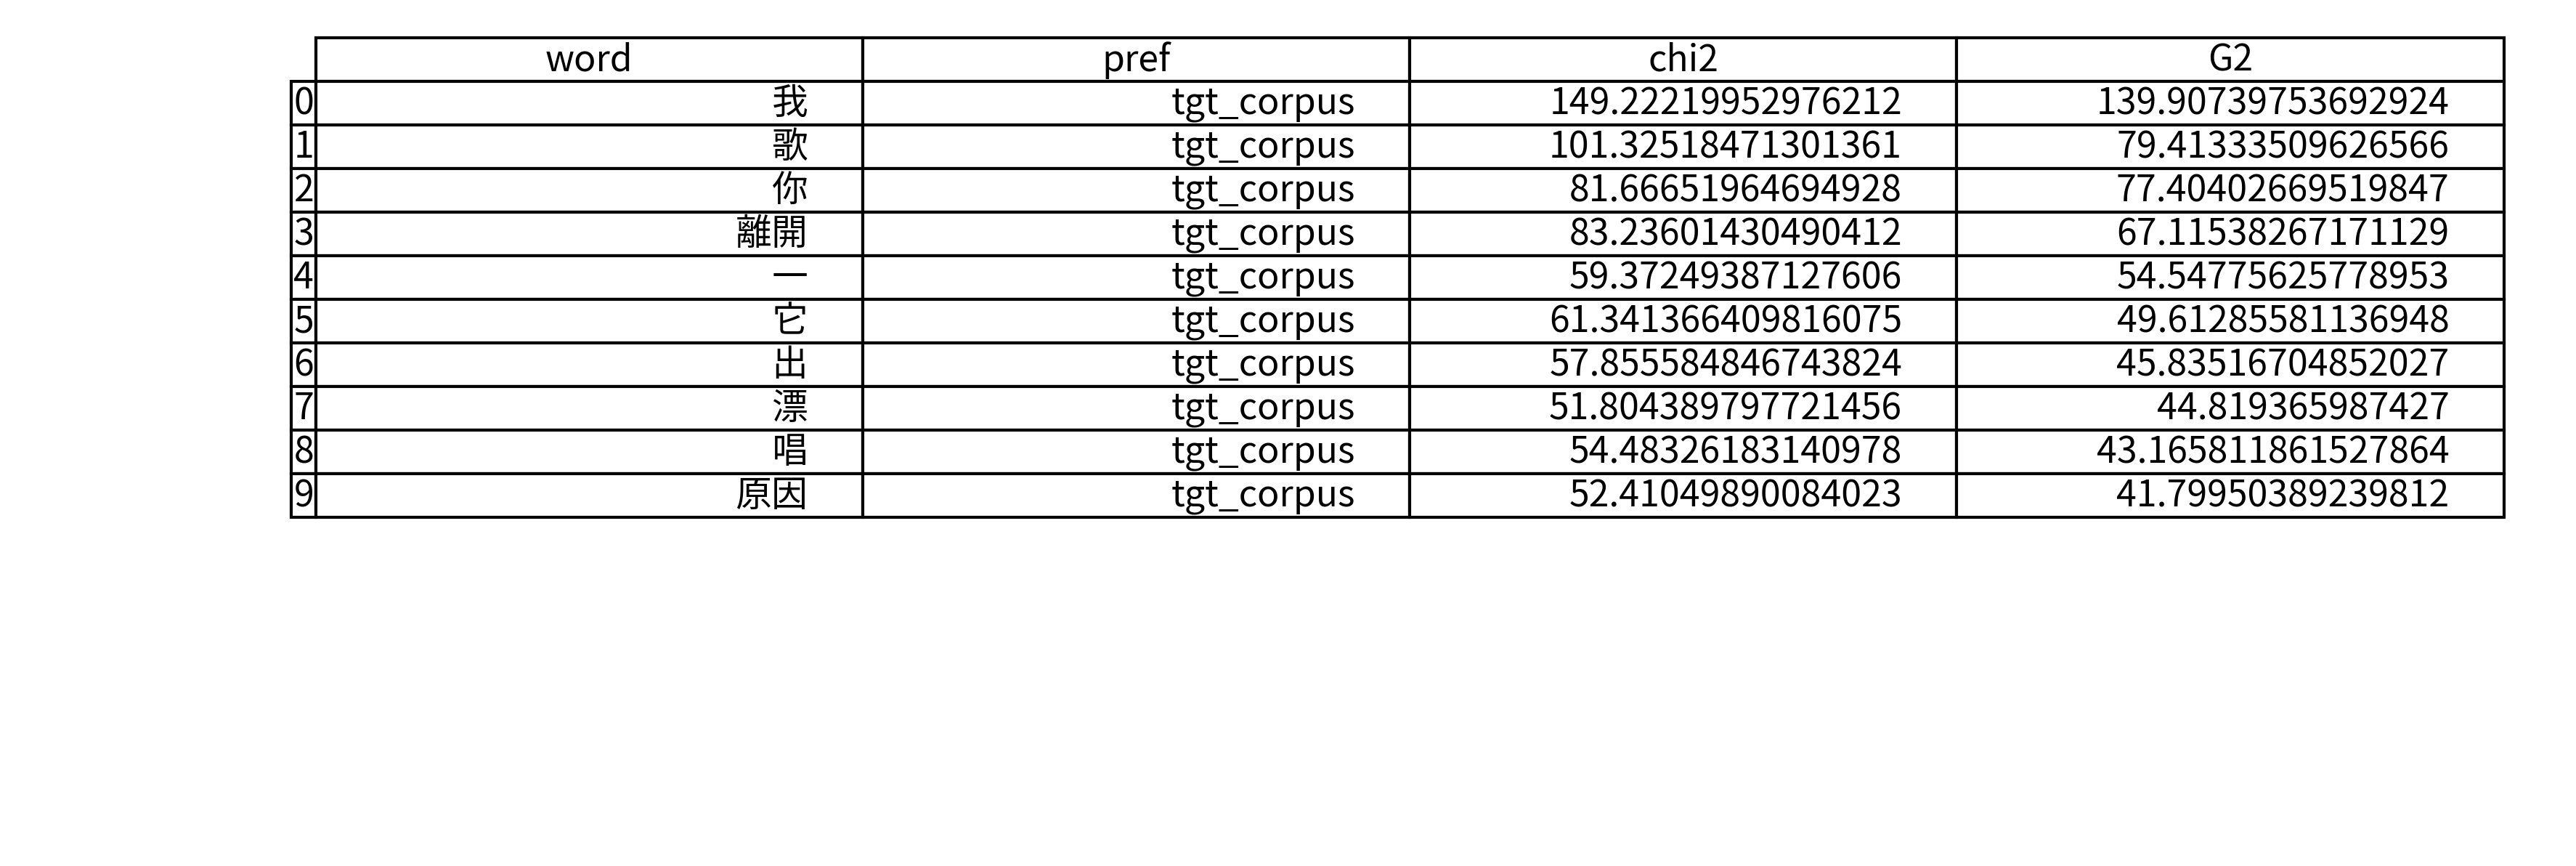

In [ ]:
from pandas.plotting import table

figure, axes = plt.subplots(figsize=(15, 5))   
axes.xaxis.set_visible(False)   
axes.yaxis.set_visible(False)   
axes.set_frame_on(False)    

table = table(axes, tgt_G2_top10_df,  
              loc='upper right',
              colWidths=[0.18]*len(tgt_G2_top10_df.columns))
table.auto_set_font_size(False)  
table.set_fontsize(12)  
table.scale(1.2, 1.2)  

 
plt.savefig('tgt_G2_top10_df.png', dpi=300)
files.download("tgt_G2_top10_df.png")

In [ ]:
tgt_chi2_top10 = get_topn(keyness, sort_by = 'chi2', n = 10)
tgt_chi2_top10_df = pd.DataFrame(tgt_chi2_top10)
tgt_chi2_top10_df


,word,pref,chi2,G2
0,我,tgt_corpus,149.222200,139.907398
1,歌,tgt_corpus,101.325185,79.413335
2,離開,tgt_corpus,83.236014,67.115383
3,你,tgt_corpus,81.666520,77.404027
4,它,tgt_corpus,61.341366,49.612856
5,一,tgt_corpus,59.372494,54.547756
6,出,tgt_corpus,57.855585,45.835167
7,唱,tgt_corpus,54.483262,43.165812
8,原因,tgt_corpus,52.410499,41.799504
9,漂,tgt_corpus,51.804390,44.819366


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

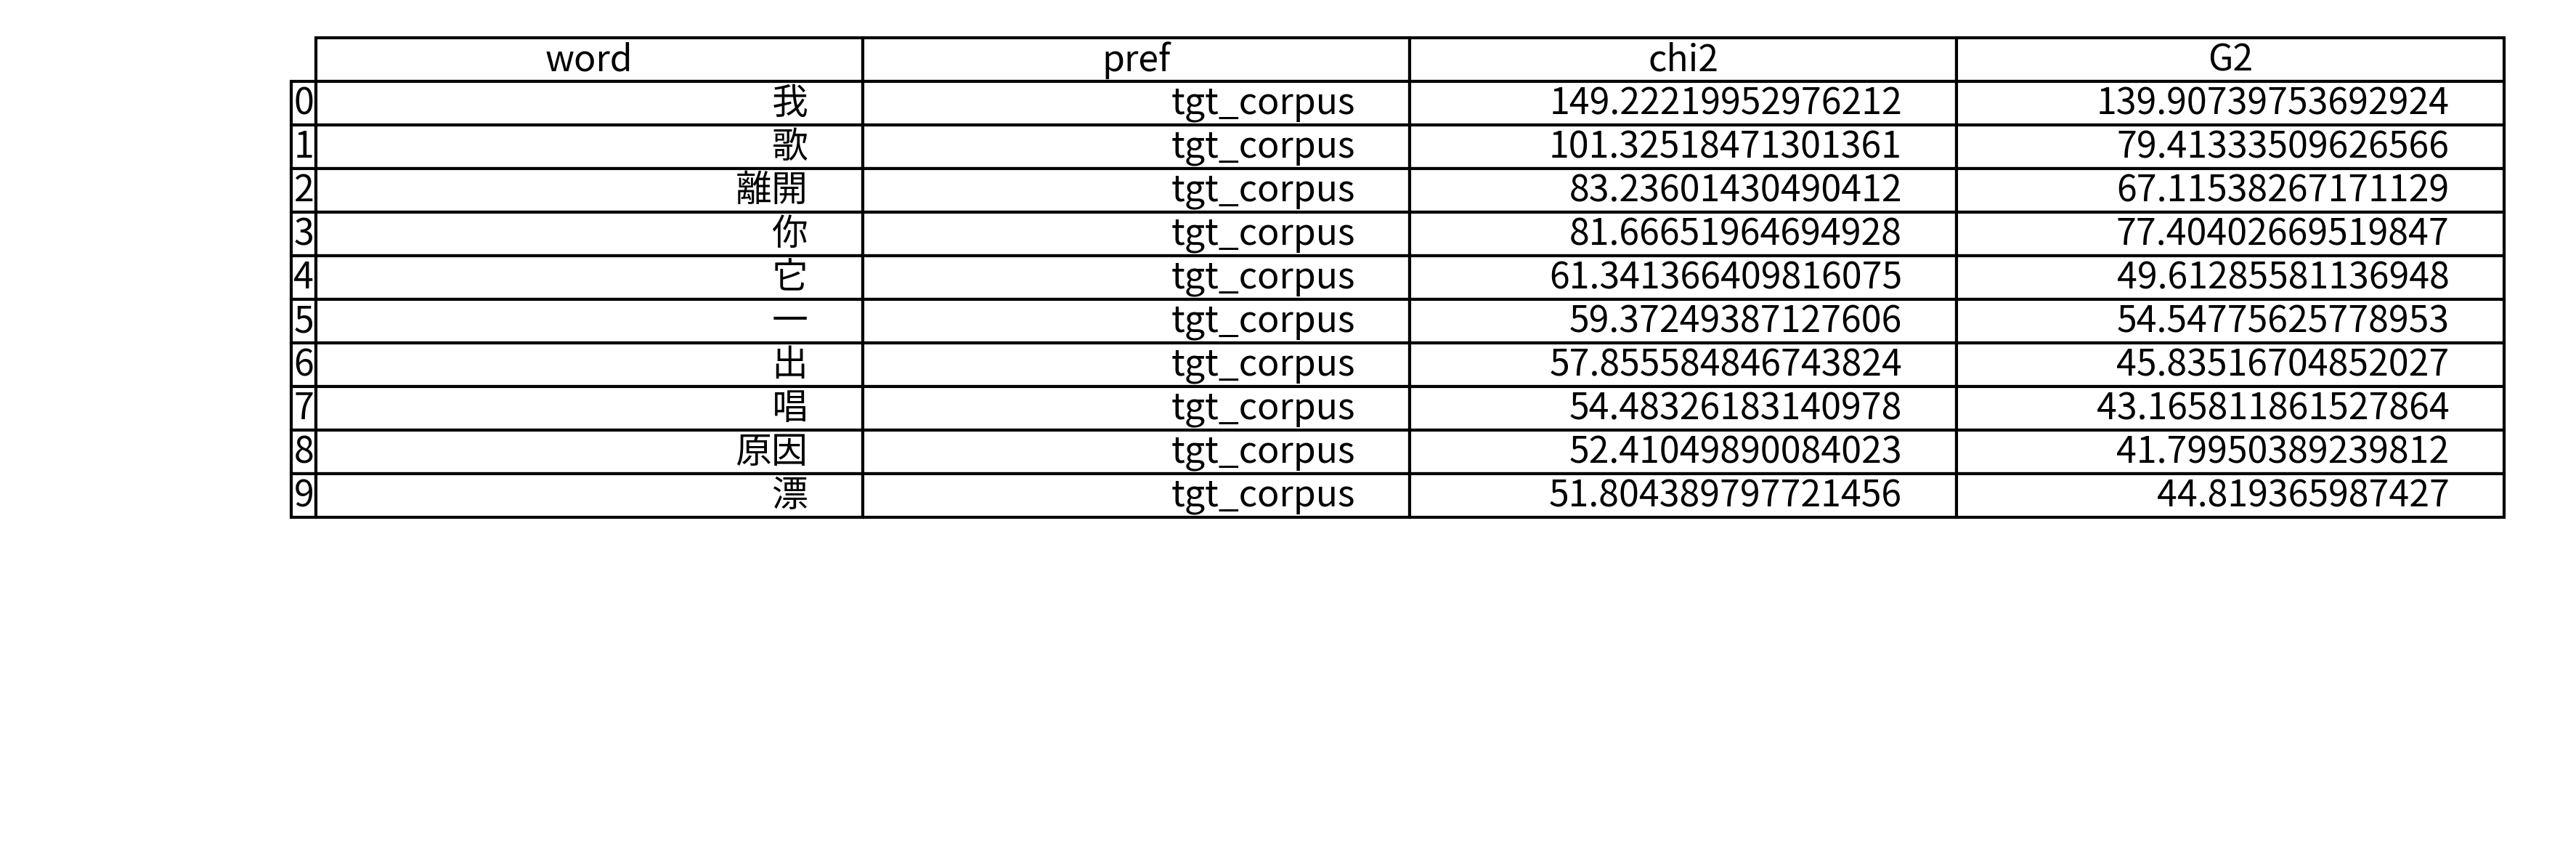

In [ ]:
from pandas.plotting import table

figure, axes = plt.subplots(figsize=(15, 5))   
axes.xaxis.set_visible(False)   
axes.yaxis.set_visible(False)   
axes.set_frame_on(False)   

table = table(axes, tgt_chi2_top10_df,  
              loc='upper right',
              colWidths=[0.18]*len(tgt_G2_top10_df.columns))
table.auto_set_font_size(False)  
table.set_fontsize(12)  
table.scale(1.2, 1.2)  

 
plt.savefig('tgt_G2_top10_df.png', dpi=300)
files.download("tgt_G2_top10_df.png")

In [ ]:
ref_G2_top10 = get_topn(keyness, pref = 'ref_corpus')
ref_G2_top10_df = pd.DataFrame(ref_G2_top10)
ref_G2_top10_df

,word,pref,chi2,G2
0,愛,ref_corpus,77.010474,88.065164
1,妳,ref_corpus,46.476983,81.529791
2,愛情,ref_corpus,34.432752,42.636276
3,幸福,ref_corpus,27.830542,42.397153
4,完美,ref_corpus,23.668156,32.769044
5,旋轉,ref_corpus,20.445438,28.518900
6,好,ref_corpus,22.179051,26.896686
7,們,ref_corpus,17.221483,26.667853
8,跑,ref_corpus,15.075123,26.467292
9,遊戲,ref_corpus,17.179509,25.145297


In [ ]:
ref_G2_top10_df.to_csv("tsaikeyness.csv")

In [ ]:
# panda read csv as df 
import pandas as pd
tsaikeynessdf = pd.read_csv('tsaikeyness.csv',encoding="utf-8") 
tsaikeynessdf[:10]

,Unnamed: 0,word,pref,chi2,G2
0,0,愛,ref_corpus,77.010474,88.065164
1,1,妳,ref_corpus,46.476983,81.529791
2,2,愛情,ref_corpus,34.432752,42.636276
3,3,幸福,ref_corpus,27.830542,42.397153
4,4,完美,ref_corpus,23.668156,32.769044
5,5,旋轉,ref_corpus,20.445438,28.518900
6,6,好,ref_corpus,22.179051,26.896686
7,7,們,ref_corpus,17.221483,26.667853
8,8,跑,ref_corpus,15.075123,26.467292
9,9,遊戲,ref_corpus,17.179509,25.145297


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

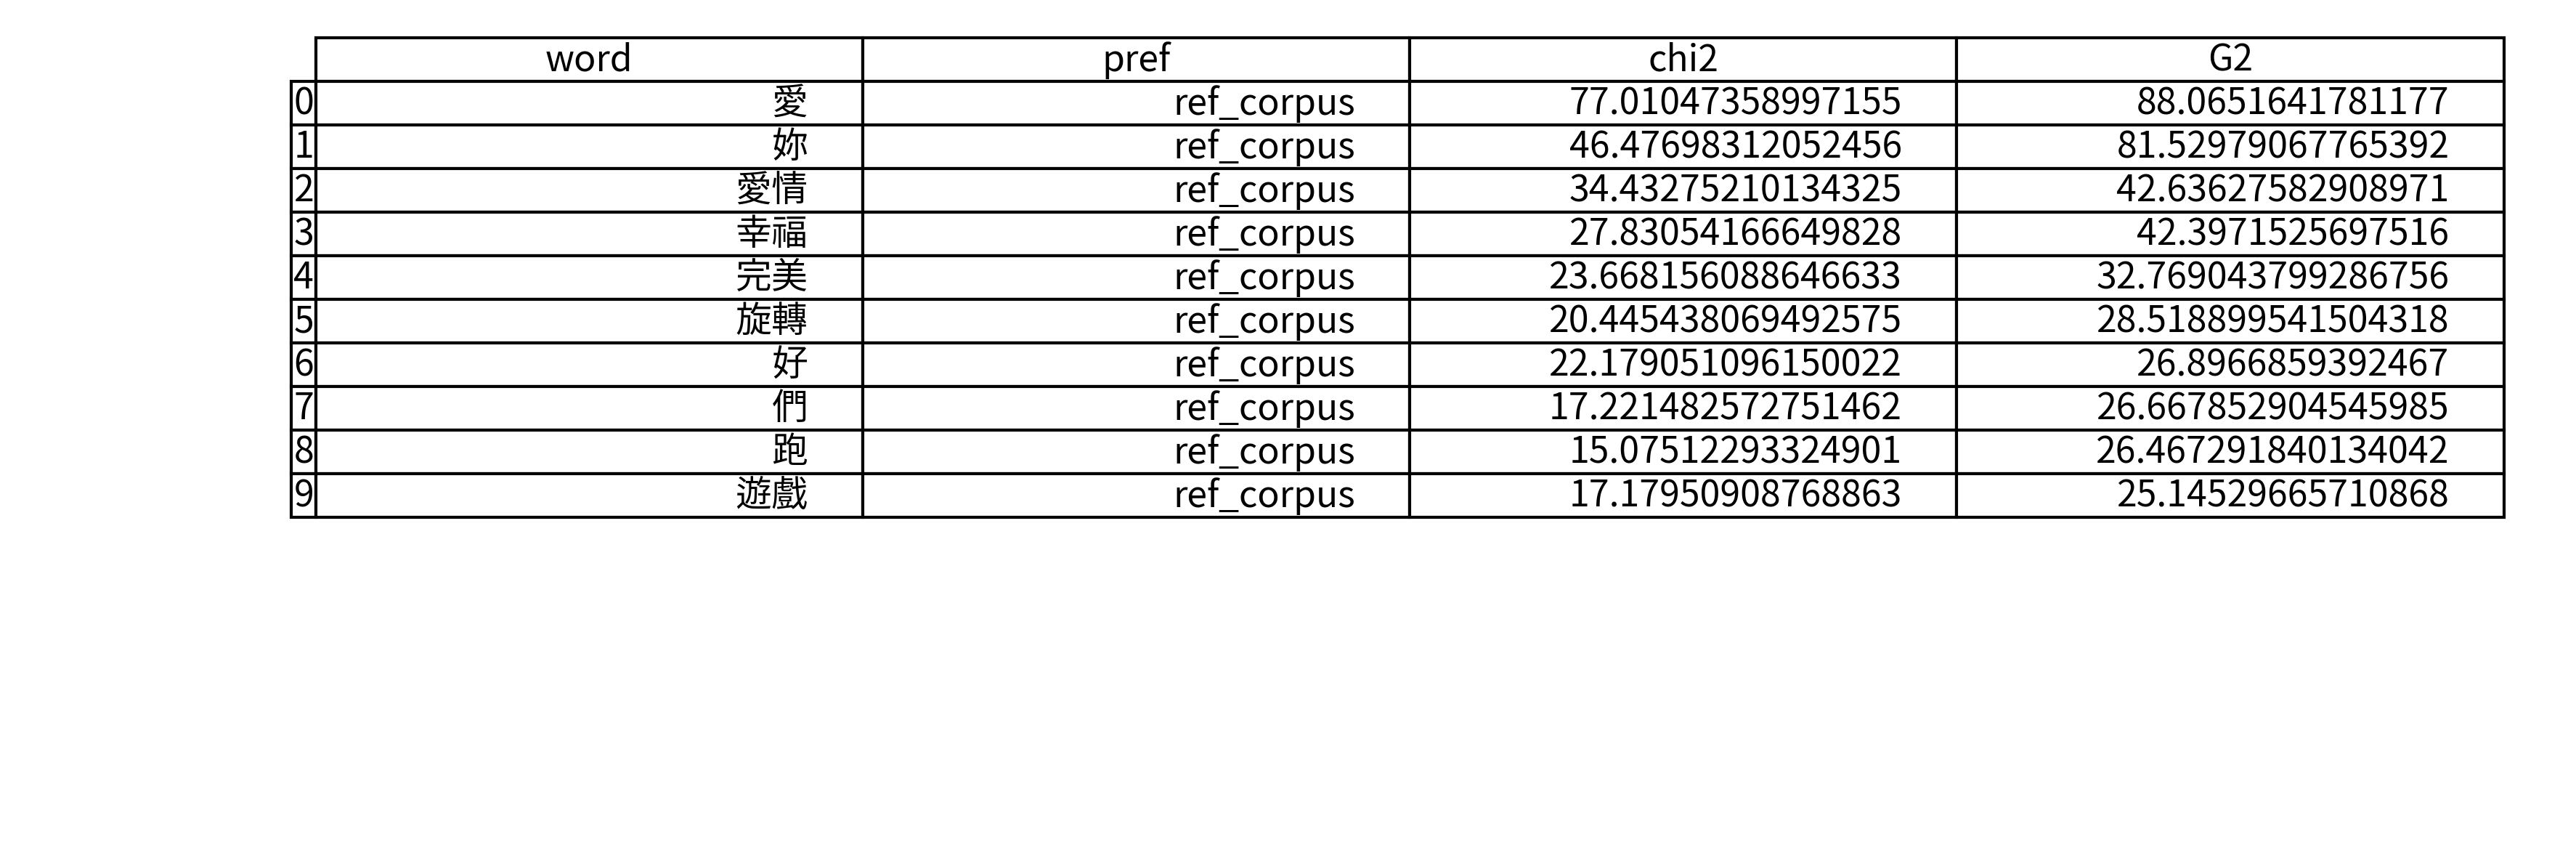

In [ ]:
from pandas.plotting import table

figure, axes = plt.subplots(figsize=(15, 5))   
axes.xaxis.set_visible(False)   
axes.yaxis.set_visible(False)   
axes.set_frame_on(False)   

table = table(axes, ref_G2_top10_df,  
              loc='upper right',
              colWidths=[0.18]*len(tgt_G2_top10_df.columns))
table.auto_set_font_size(False)  
table.set_fontsize(12)  
table.scale(1.2, 1.2)  
 
plt.savefig('ref_G2_top10_df.png', dpi=300)
files.download("ref_G2_top10_df.png")

In [ ]:
ref_chi2_top10 = get_topn(keyness, pref = 'ref_corpus', sort_by = 'chi2', n = 10)
ref_chi2_top10_df = pd.DataFrame(ref_chi2_top10)
ref_chi2_top10_df


,word,pref,chi2,G2
0,愛,ref_corpus,77.010474,88.065164
1,妳,ref_corpus,46.476983,81.529791
2,愛情,ref_corpus,34.432752,42.636276
3,幸福,ref_corpus,27.830542,42.397153
4,完美,ref_corpus,23.668156,32.769044
5,好,ref_corpus,22.179051,26.896686
6,旋轉,ref_corpus,20.445438,28.518900
7,們,ref_corpus,17.221483,26.667853
8,遊戲,ref_corpus,17.179509,25.145297
9,美,ref_corpus,16.936964,22.320186


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

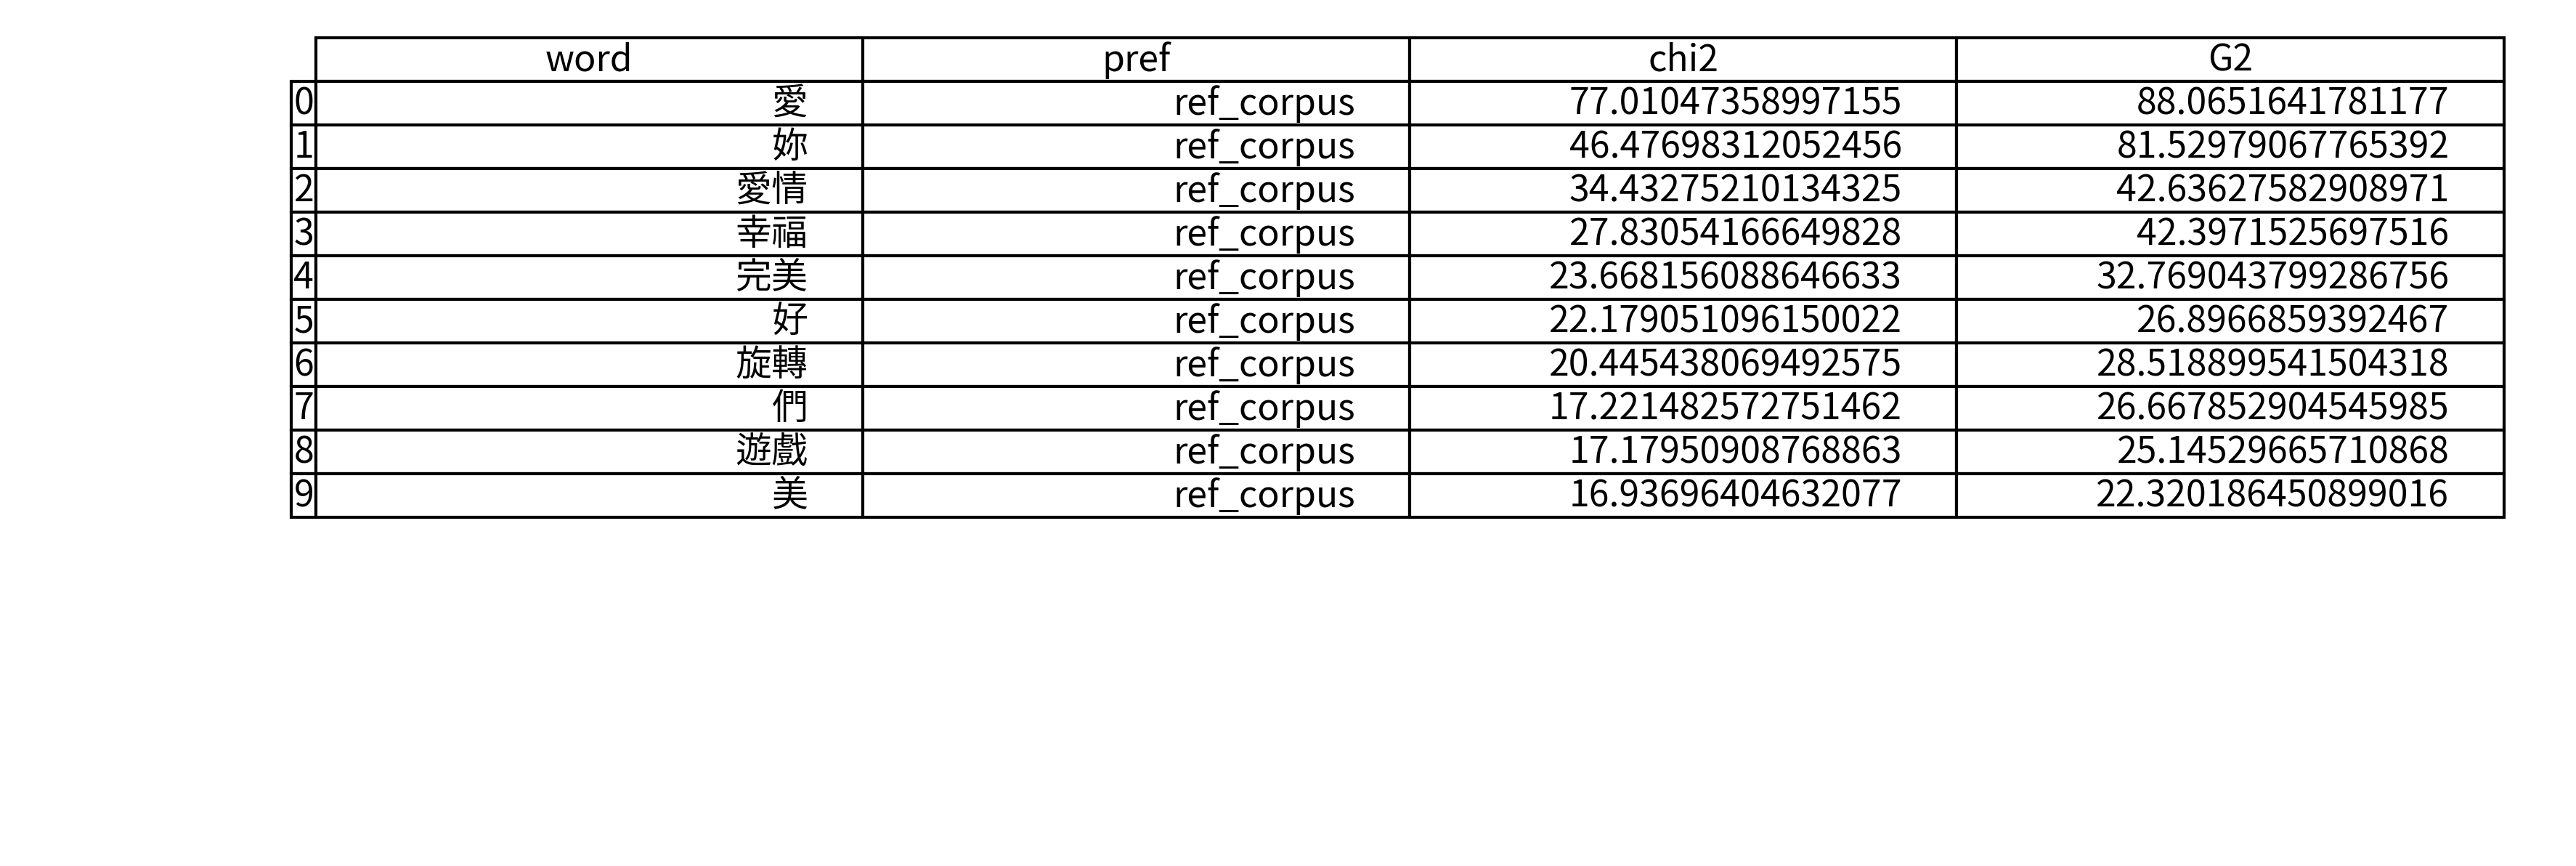

In [ ]:
from pandas.plotting import table

figure, axes = plt.subplots(figsize=(15, 5))   
axes.xaxis.set_visible(False)   
axes.yaxis.set_visible(False)   
axes.set_frame_on(False)   

table = table(axes, ref_chi2_top10_df,  
              loc='upper right',
              colWidths=[0.18]*len(tgt_G2_top10_df.columns))
table.auto_set_font_size(False)  
table.set_fontsize(12)  
table.scale(1.2, 1.2)  


plt.savefig('tgt_G2_top10_df.png', dpi=300)
files.download("tgt_G2_top10_df.png")

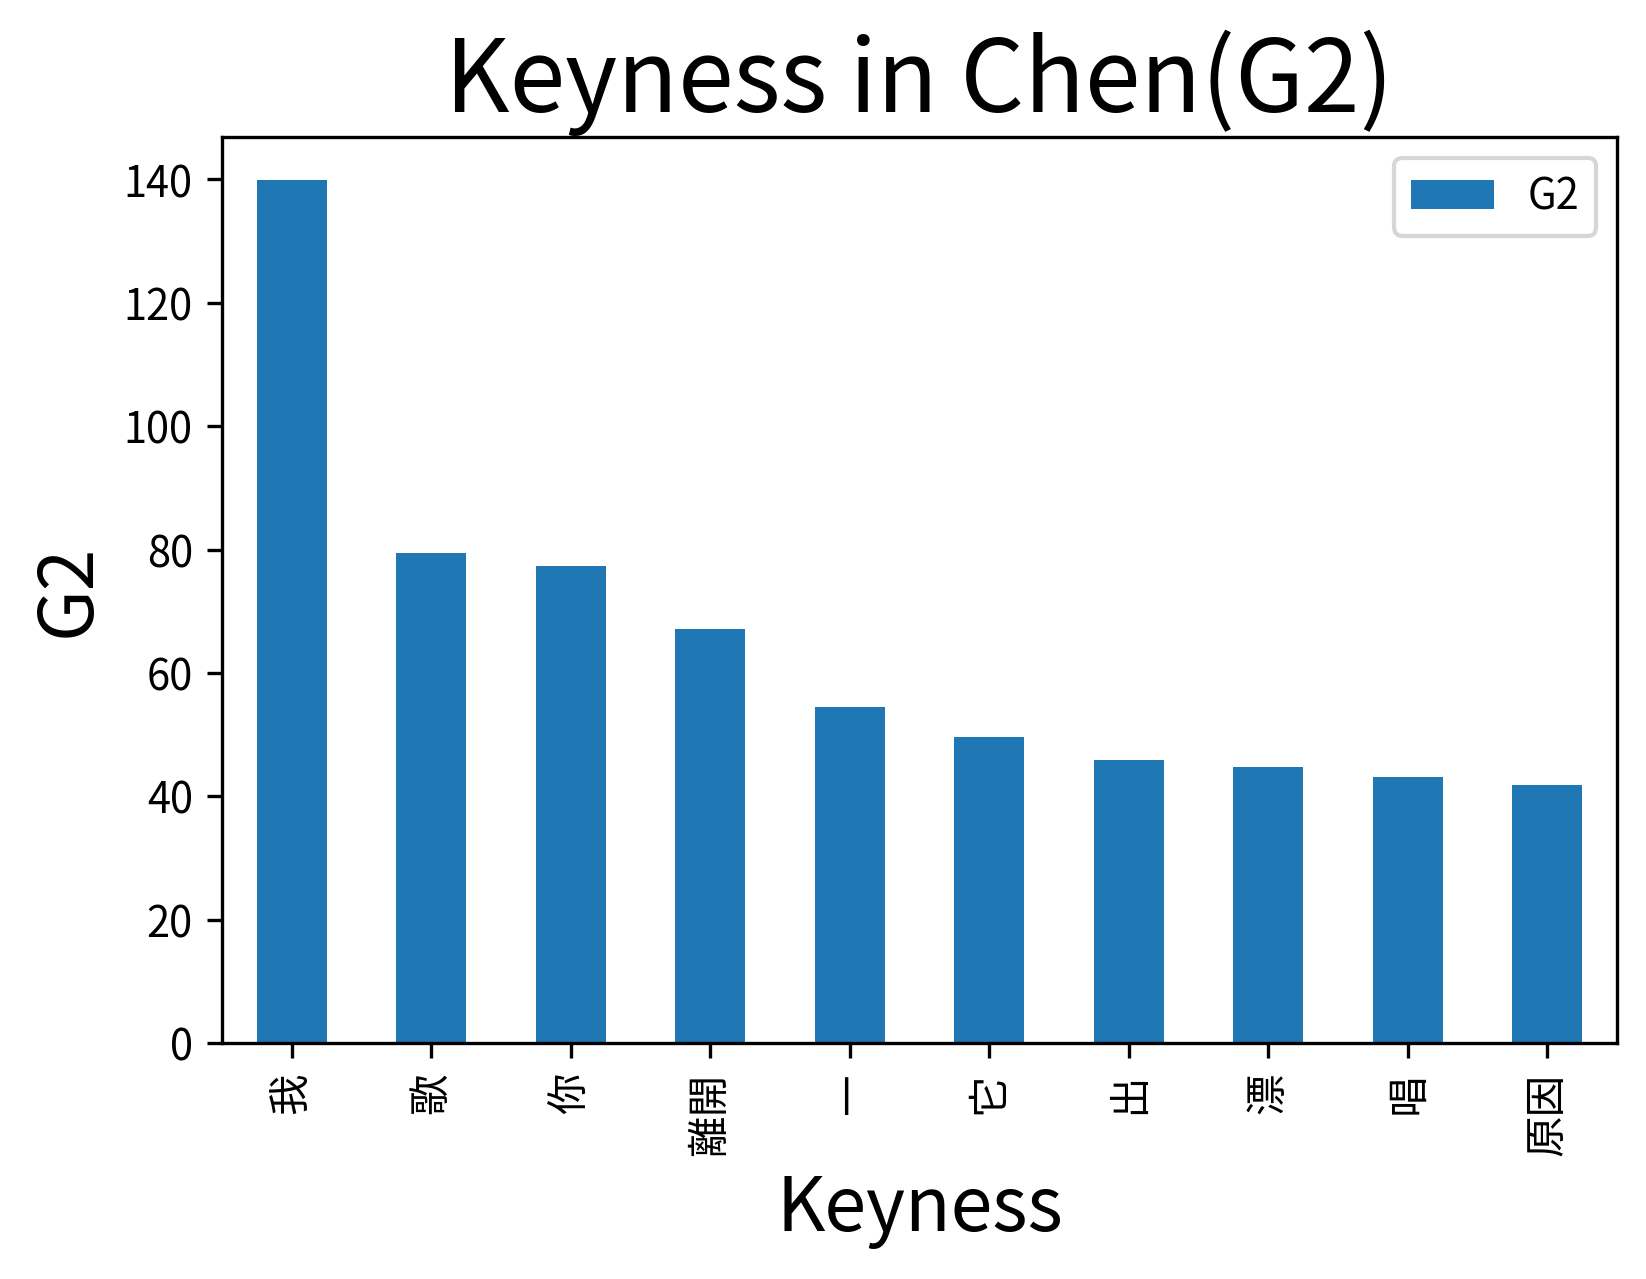

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tgt_G2_top10_df.plot.bar(x = 'word', y = 'G2')

plt.title('Keyness in Chen(G2)', fontsize=24)  
plt.xlabel('Keyness', fontsize=18)  
plt.ylabel('G2', fontsize=18) 


plt.savefig('tgt_G2_top10_bar.png', dpi=300)
plt.show()
files.download("tgt_G2_top10_bar.png")

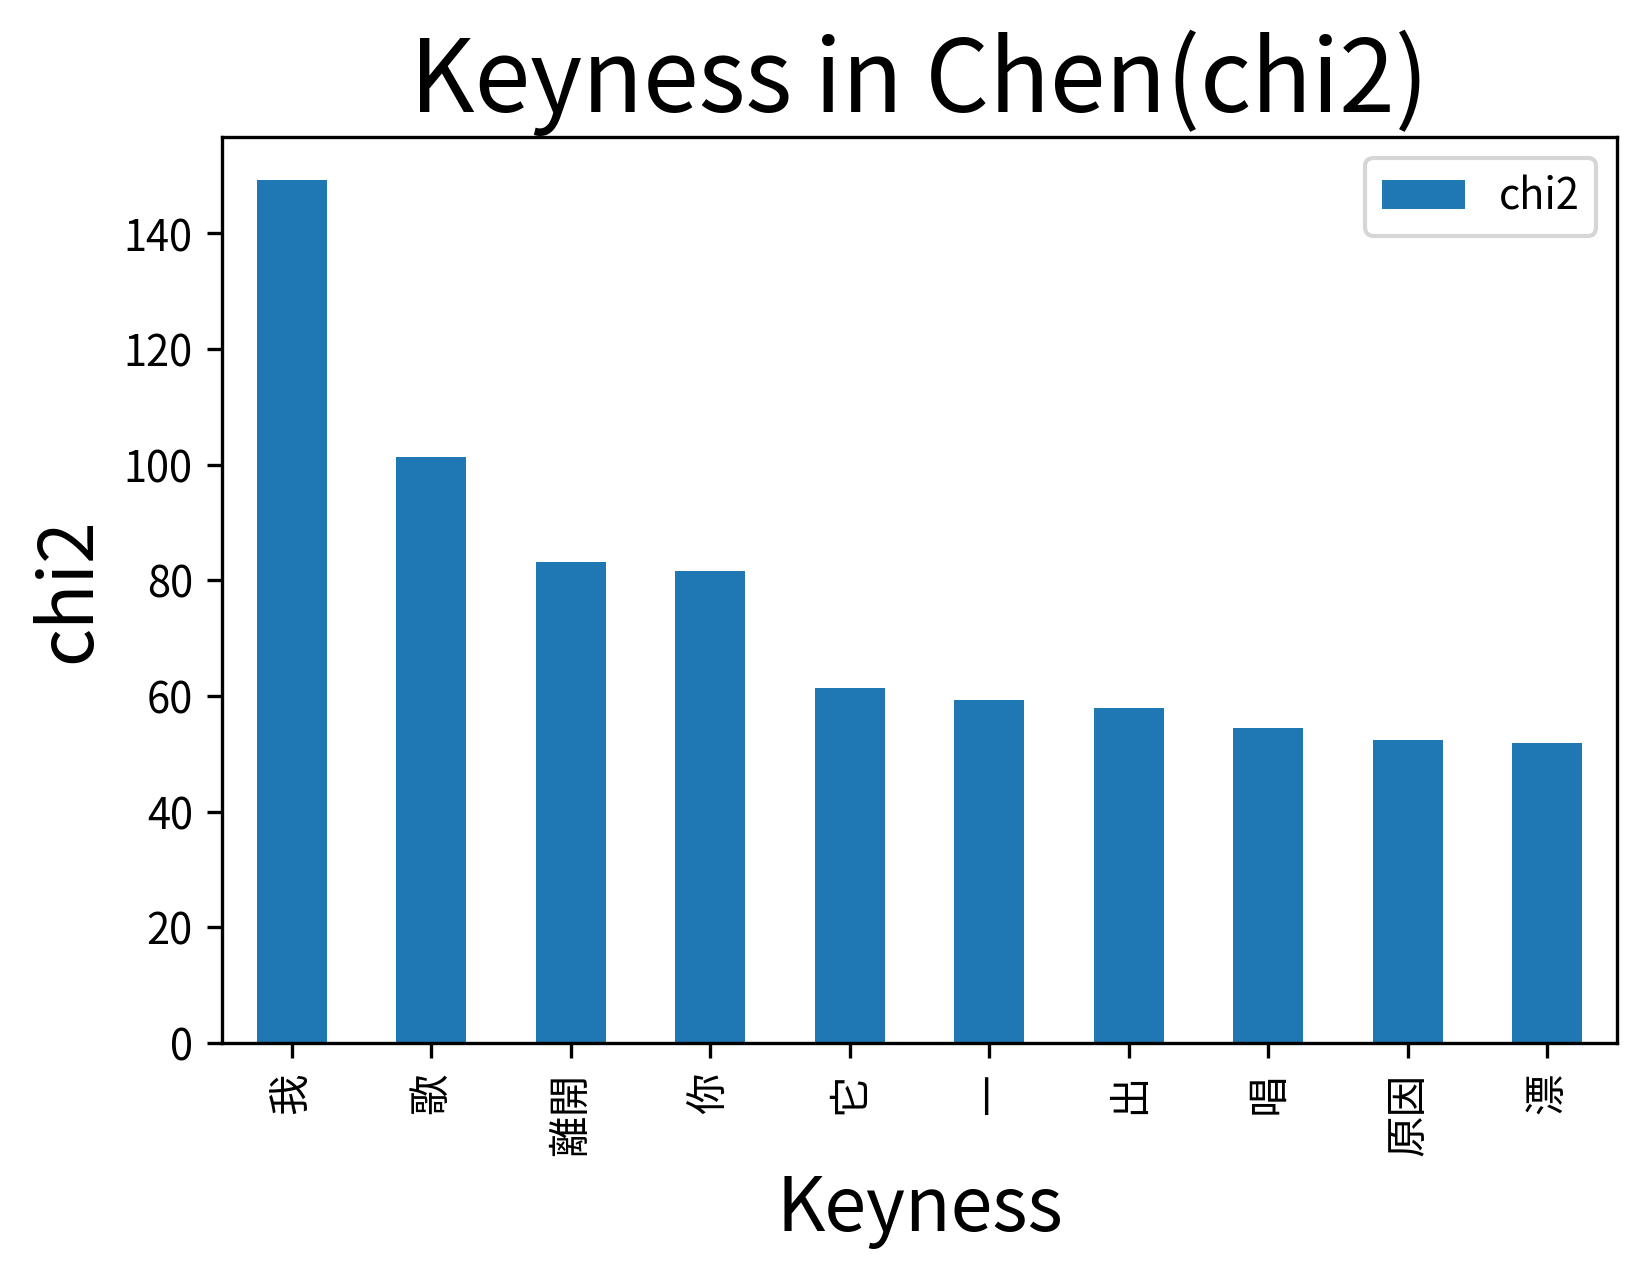

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tgt_chi2_top10_df.plot.bar(x = 'word', y = 'chi2')
 
plt.title('Keyness in Chen(chi2)', fontsize=24)  
plt.xlabel('Keyness', fontsize=18)  
plt.ylabel('chi2', fontsize=18)  
 
plt.savefig('tgt_chi2_top10_bar.png', dpi=300)
plt.show()
files.download("tgt_chi2_top10_bar.png")

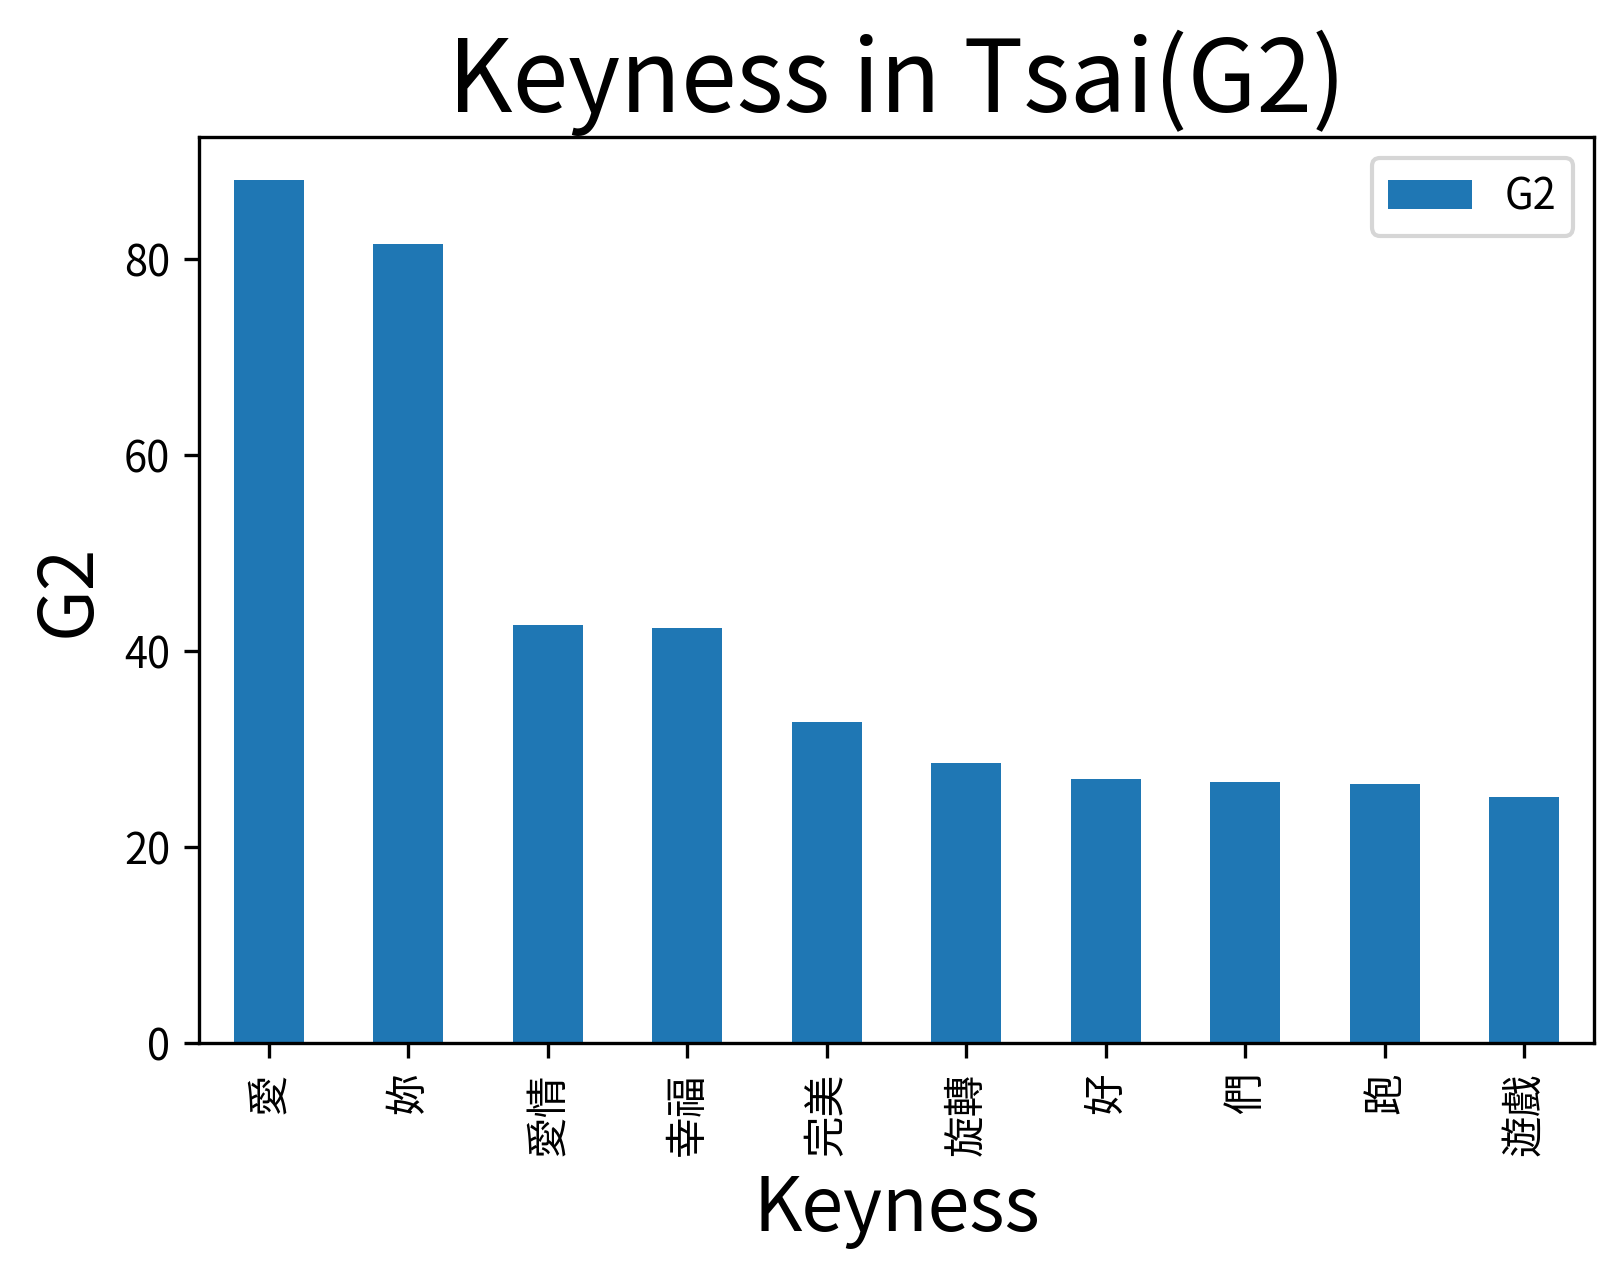

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

ref_G2_top10_df.plot.bar(x = 'word', y = 'G2')

plt.title('Keyness in Tsai(G2)', fontsize=24)  
plt.xlabel('Keyness', fontsize=18)  
plt.ylabel('G2', fontsize=18)  

 
plt.savefig('ref_G2_top10_bar.png', dpi=300)
plt.show()
files.download("ref_G2_top10_bar.png")

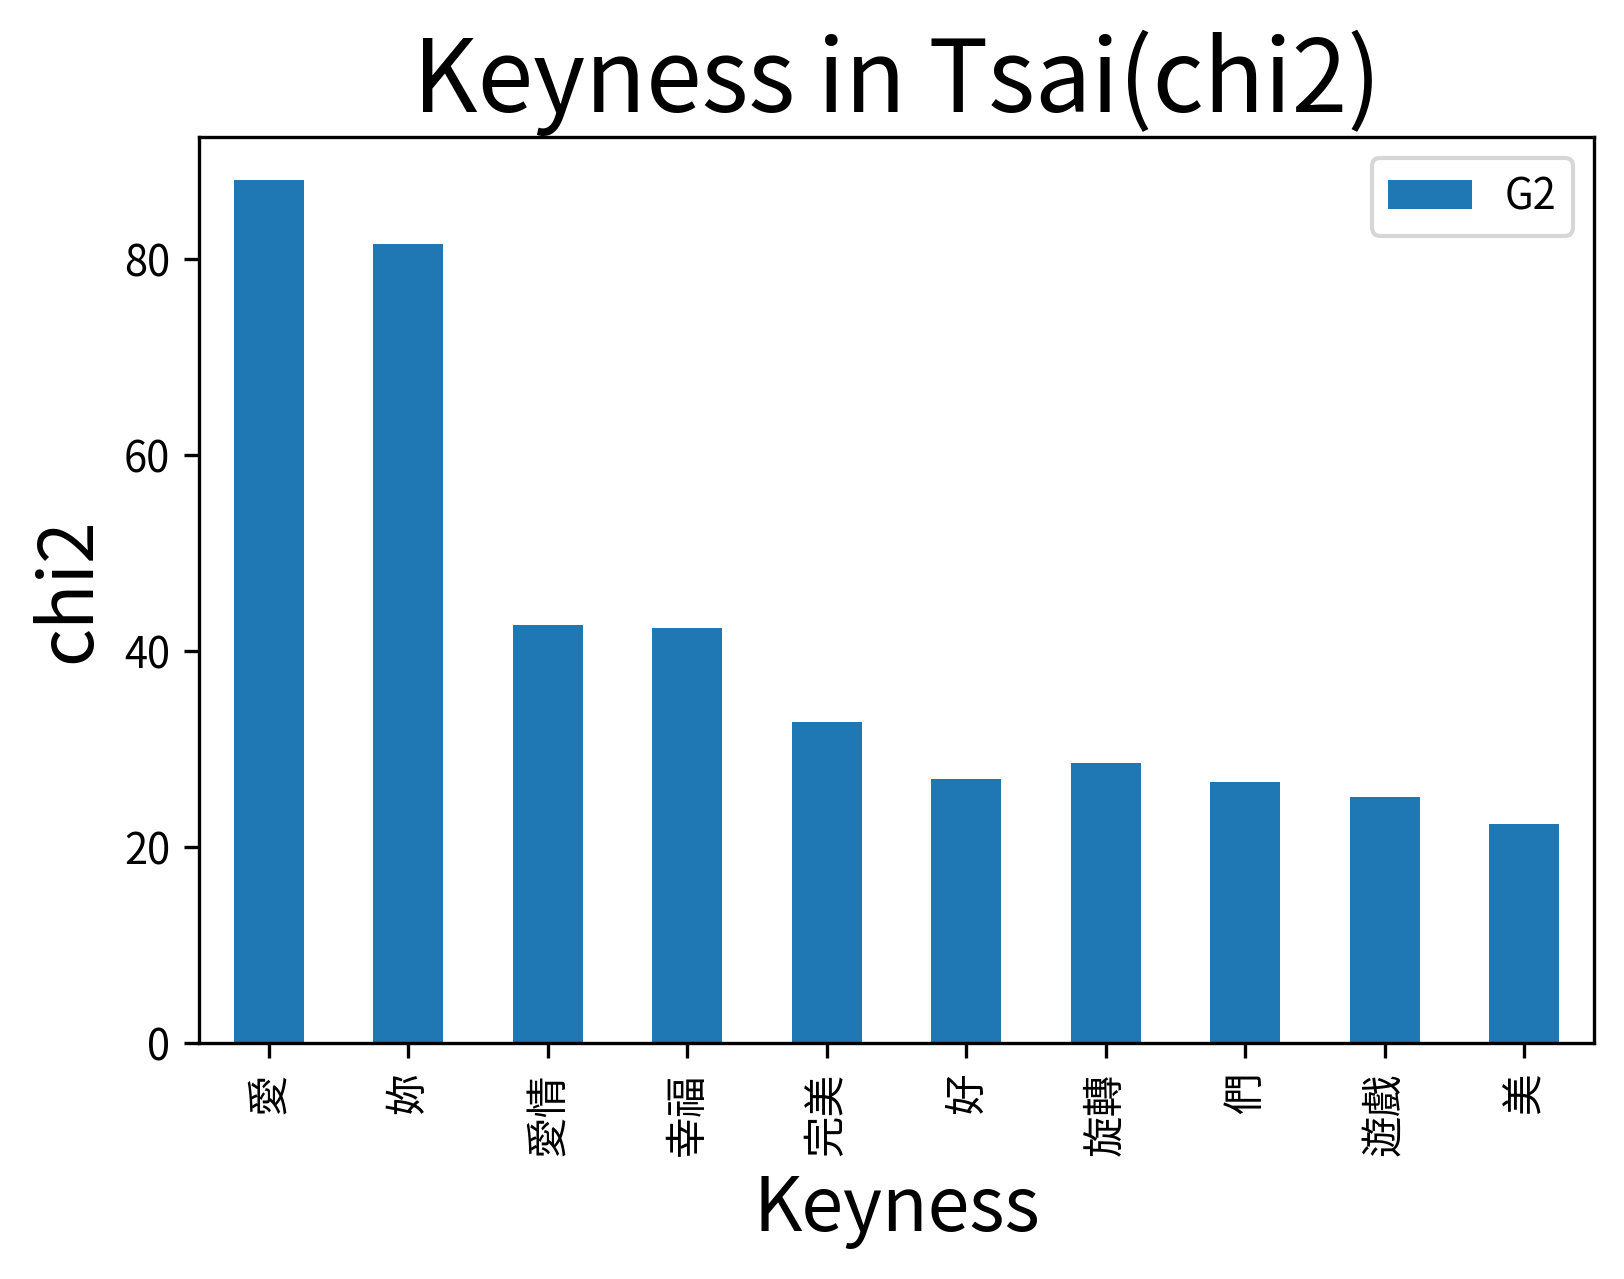

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

ref_chi2_top10_df.plot.bar(x = 'word', y = 'G2')

plt.title('Keyness in Tsai(chi2)', fontsize=24)  
plt.xlabel('Keyness', fontsize=18)  
plt.ylabel('chi2', fontsize=18)  
 
plt.savefig('ref_chi2_top10_bar.png', dpi=300)
plt.show()
files.download("ref_chi2_top10_bar.png")

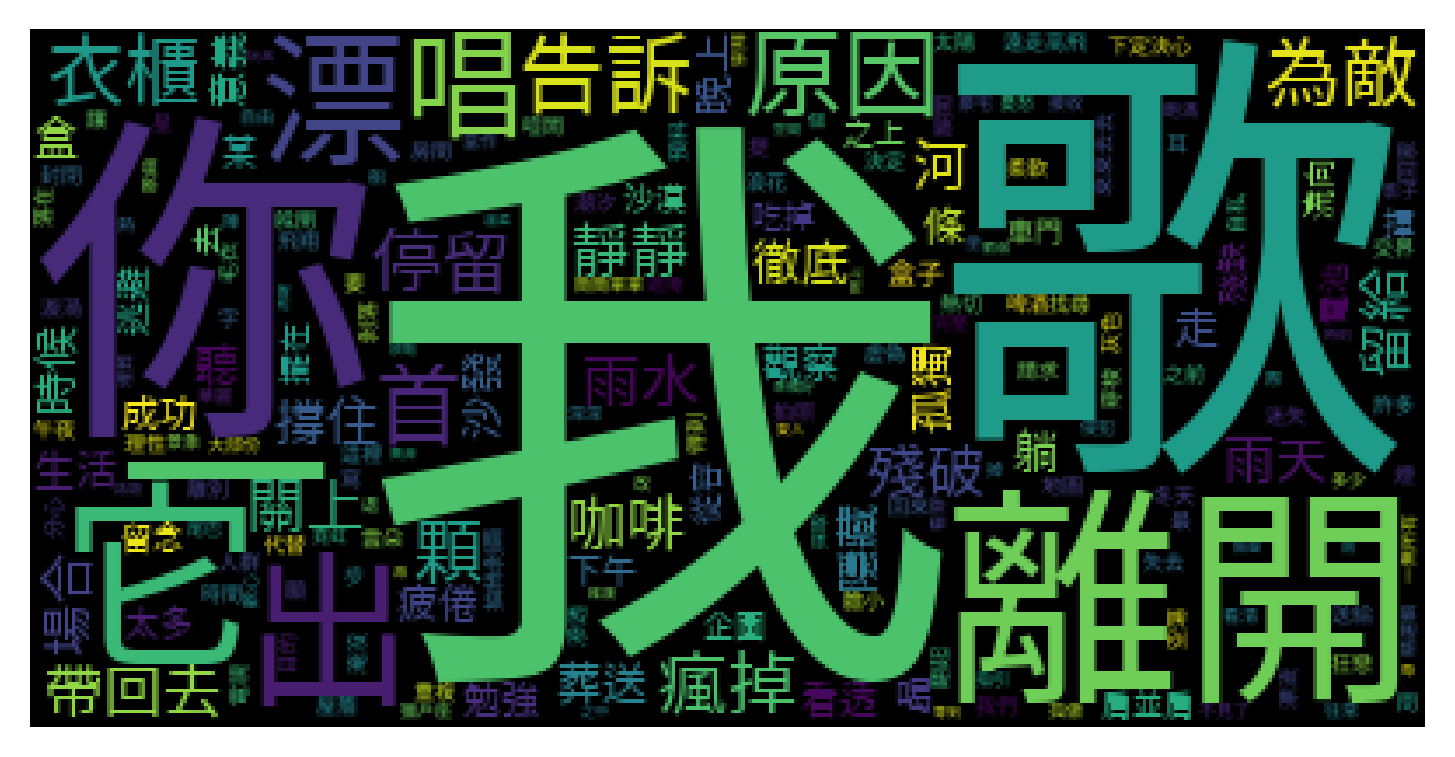

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

tgt_dict = {i['word']: i['G2'] for i in keyness if i['pref'] == 'tgt_corpus'}

 
wordcloud = WordCloud(font_path = 'taipei_sans_tc_beta.ttf')
wordcloud.generate_from_frequencies(frequencies = tgt_dict)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')

 
plt.savefig('tgt_G2_wordcloud.png', dpi=300)
plt.show()
files.download("tgt_G2_wordcloud.png")

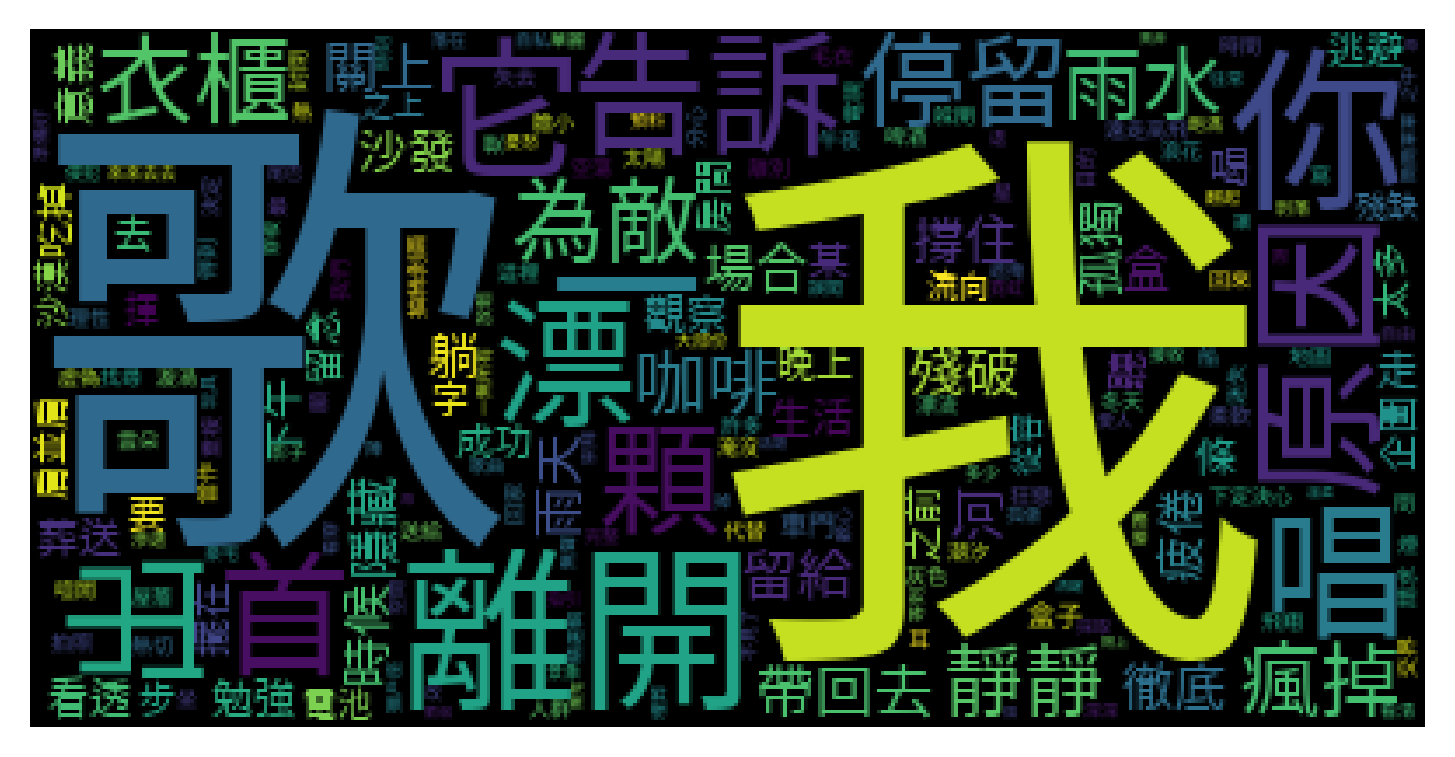

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

tgt_dict = {i['word']: i['chi2'] for i in keyness if i['pref'] == 'tgt_corpus'}

 
wordcloud = WordCloud(font_path = 'taipei_sans_tc_beta.ttf')
wordcloud.generate_from_frequencies(frequencies = tgt_dict)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
 
plt.savefig('tgt_chi2_wordcloud.png', dpi=300)
plt.show()
files.download("tgt_chi2_wordcloud.png")

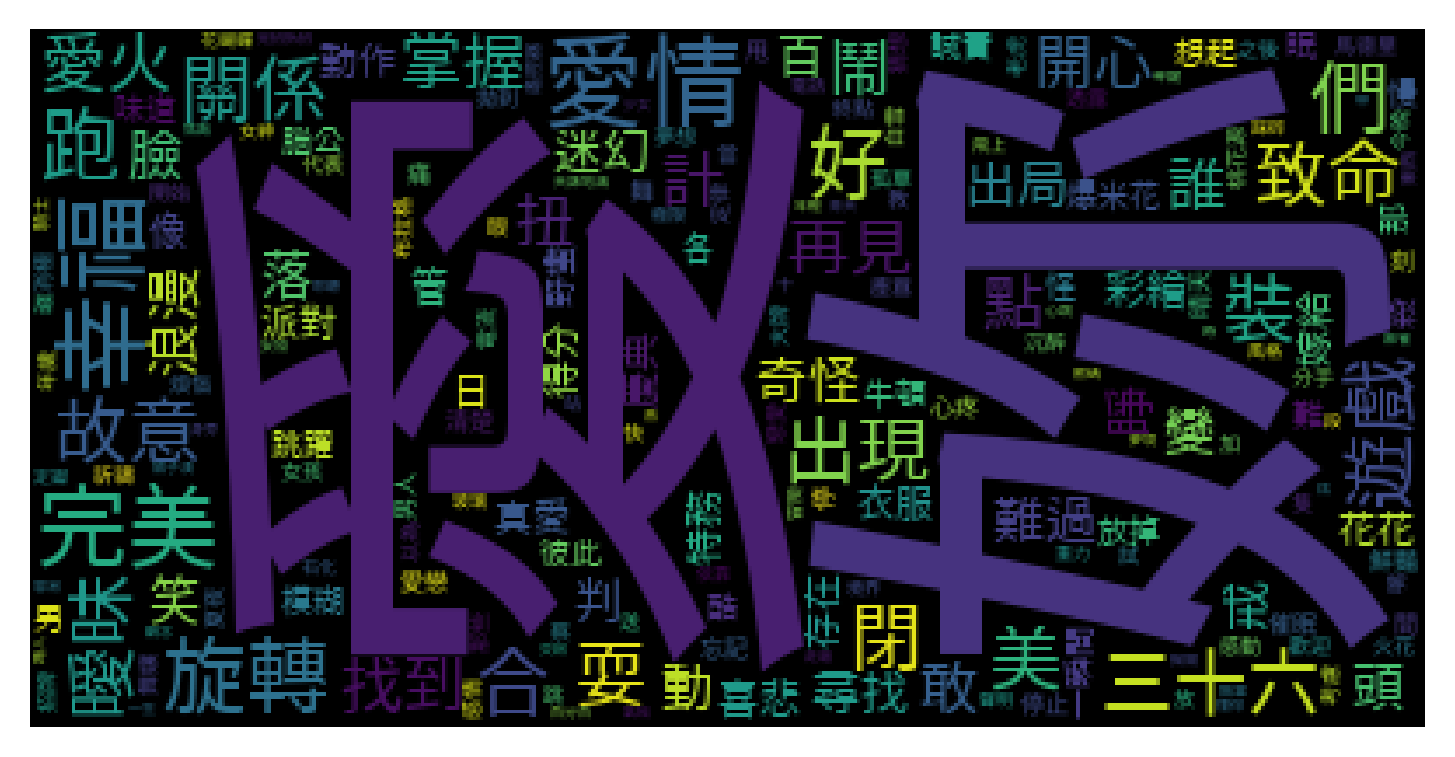

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

ref_dict = {i['word']: i['G2'] for i in keyness if i['pref'] == 'ref_corpus'}

 
wordcloud = WordCloud(font_path = 'taipei_sans_tc_beta.ttf')
wordcloud.generate_from_frequencies(frequencies = ref_dict)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')

 
plt.savefig('ref_G2_wordcloud.png', dpi=300)
plt.show()
files.download("ref_G2_wordcloud.png")

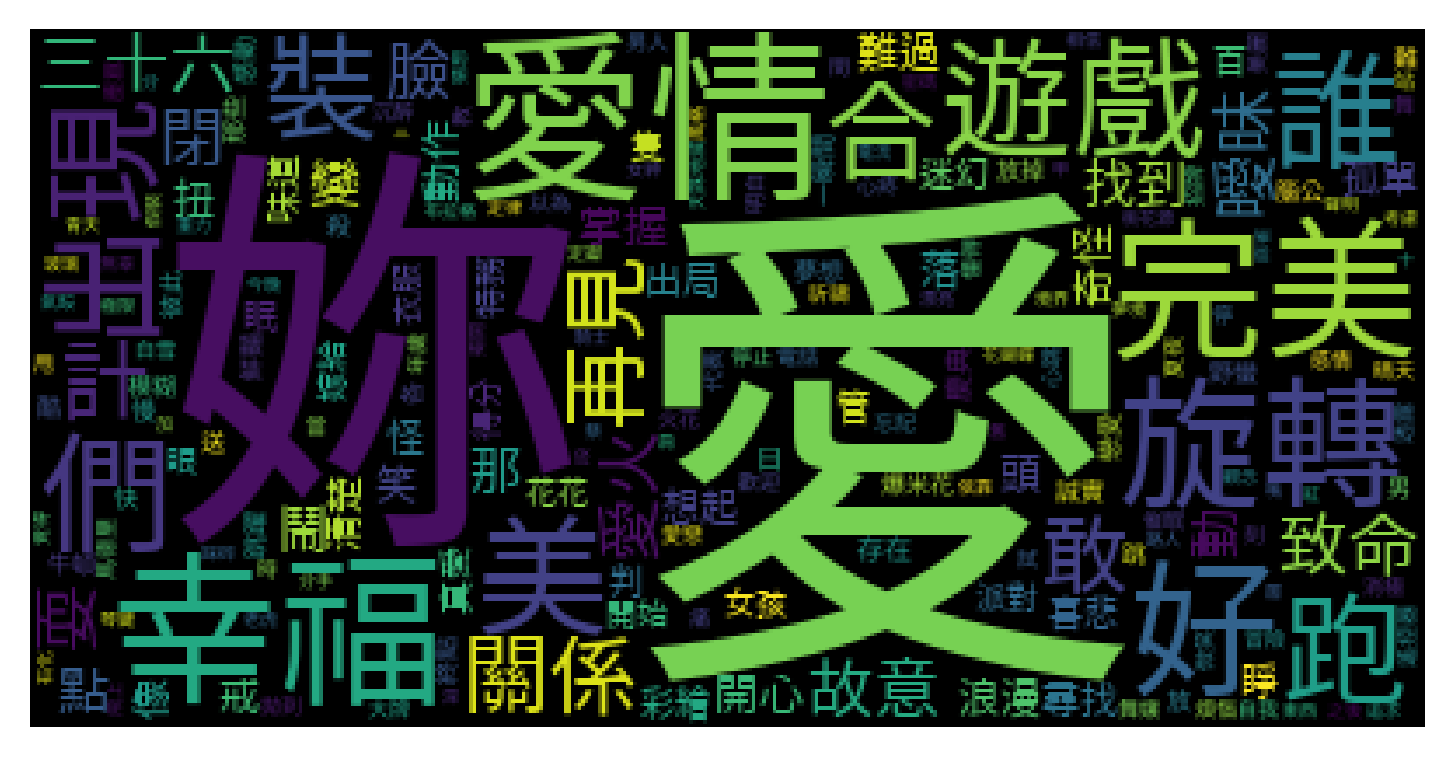

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

ref_dict = {i['word']: i['chi2'] for i in keyness if i['pref'] == 'ref_corpus'}

 
wordcloud = WordCloud(font_path = 'taipei_sans_tc_beta.ttf')
wordcloud.generate_from_frequencies(frequencies = ref_dict)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')

 
plt.savefig('ref_chi2_wordcloud.png', dpi=300)
plt.show()
files.download("ref_chi2_wordcloud.png")

#Python BTM

In [ ]:
pip install bitermplus

In [ ]:
pip install plotly_express==0.4.0

In [ ]:
pip install tmplot

In [ ]:
## Default Style Settings
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import nltk
import bitermplus as btm
import tmplot as tmp
import plotly.express as px

## Coherence Evaluation 

In [ ]:

def compute_coherence_values(limit,it_limit ,it_start=0, it_step=10, start=2, step=3,bk=False):
  #SyntaxError: non-default argument follows default argument
  # it_limit,it_start=0, it_step=10
  #https://clay-atlas.com/blog/2020/06/17/python-cn-error-syntax-error-non-default-argument-follows-default-argument/
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    coherence_values_mean = []
    model_list = []
    it_list = []
    top_words_list=[]
    perp_list = []
    for num_topics in range(start, limit, step):
      for it in range(it_start, it_limit, it_step):
        model = btm.BTM(X, vocabulary, seed=12321, T=num_topics, M=20, alpha=1, beta=0.01,has_background=bk) #alpha=50/8
        model.fit(biterms, iterations=it)
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        it_list.append(it)
        model_list.append(model)
        coherence = model.coherence_
        #print (coherence)
        #print (coherence.mean())
        #coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence)
        coherence_values_mean.append(coherence.mean())
        perp = model.perplexity_
        perp_list.append(perp)
        stable_topics = range(0,num_topics)
        top_words = btm.get_top_topic_words(model,words_num=100,topics_idx=stable_topics)
        top_words_list.append(top_words)

    return it_list,model_list, coherence_values,coherence_values_mean,top_words_list,perp_list


## Tsai+Chen

### BG

In [ ]:

# Importing data
texts = tcdf.text
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)

# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)

docs_lens = list(map(len, docs_vec))



biterms = btm.get_biterms(docs_vec)


it_list,model_list, coherence_values,coherence_values_mean,top_words_list,perp_list = compute_coherence_values(bk=True,it_start=0,it_limit=100 , it_step=20, start=4, limit=100, step=4)
topic_num = [len(i) for i in coherence_values]
topic_num
df_bk = pd.DataFrame(list(zip(it_list,topic_num, coherence_values_mean,perp_list,top_words_list,coherence_values)),
               columns =['iteration_num',"topic_num", 'co_mean','perp',"top_word",'co_each_topic'])
df_bk

In [ ]:

import plotly.express as px

fig = px.line(df_bk, x='topic_num', y='co_mean', text='topic_num',  color="iteration_num") #log_x=True, size_max=100,

fig.update_traces(textposition="bottom right")

fig.update_layout(title_text='BTM_Coherence Mean_Tsai and Chen with Background', title_x=0.5)
fig.show()


In [ ]:

matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
it_set = set(df_bk['iteration_num']) 
plt.figure()
for it in it_set:
     selected_data = df_bk.loc[df_bk['iteration_num'] == it]
     plt.plot(selected_data['topic_num'], selected_data['co_mean'], label=it,linestyle='--', marker="o") #, color='b'

plt.xlabel("Num Topics")
plt.ylabel("Coherence score mean with Backgound in Tsai and Chen")
plt.legend( title='Num Iteration', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)  

plt.show()


In [ ]:
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
vocab_dict
import pandas as pd
tc_voc_df = pd.DataFrame(sorted(list(vocab_dict.items()),reverse= True),
                   columns=['Word', 'Freq'])
tc_voc_df




In [ ]:
tc_voc_df.to_csv("tc_bgvoc_df.csv")

In [ ]:
model = btm.BTM(
    X, vocabulary, seed=12321, T=12, M=20,alpha=1, beta=0.01 ) 
model.fit(biterms, iterations=1000) #先80等等看1000的

stable_topics = range(0,model.topics_num_)
top_words = btm.get_top_topic_words(
    model,
    words_num=100,
    topics_idx=stable_topics ) 
top_words #top 100 words for each topic in btm model of python



In [ ]:
top_words[:10]

In [ ]:

top_topic_wordsdf = top_words.stack().sort_index().value_counts().rename_axis('topic').reset_index(name='count')
top_topic_wordsdf.to_csv("repeated_bgtopic_word_tc.csv")
top_topic_wordsdf




In [ ]:

import pandas as pd
repeated_bgtopic_word_tcdf = pd.read_csv('repeated_bgtopic_word_tc.csv',encoding="utf-8") #122 #但有兩首因為雖然同歌名與歌詞但字數有點不一樣所以仍被保留
repeated_bgtopic_word_tcdf[:10].drop(['Unnamed: 0'], axis=1)



In [ ]:

p_zd=model.matrix_docs_topics_
top_docs = btm.get_top_topic_docs(
    texts,
    p_zd=p_zd,
    docs_num=100,
    topics_idx=stable_topics)
top_docs 

In [ ]:
#https://githubplus.com/maximtrp/tmplot
import tmplot as tmp
# Run the interactive report interface
tmp.report(model=model, docs=texts)

### no BG

In [ ]:

# Importing data
texts = tcdf.text
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)

docs_vec = btm.get_vectorized_docs(texts, vocabulary)

docs_lens = list(map(len, docs_vec))


biterms = btm.get_biterms(docs_vec)

it_list,model_list, coherence_values,coherence_values_mean,top_words_list,perp_list = compute_coherence_values(bk=False,it_start=0,it_limit=100 , it_step=20, start=4, limit=100, step=4)


In [ ]:
topic_num = [len(i) for i in coherence_values]
topic_num
tc_df = pd.DataFrame(list(zip(it_list,topic_num, coherence_values_mean,perp_list,top_words_list,coherence_values)),
               columns =['iteration_num',"topic_num", 'co_mean','perp',"top_word",'co_each_topic'])
tc_df

In [ ]:

import plotly.express as px

fig = px.line(tc_df, x='topic_num', y='co_mean', text='topic_num',  color="iteration_num") #log_x=True, size_max=100,

fig.update_traces(textposition="bottom right")

fig.update_layout(title_text='BTM_Coherence Mean_Tsai and Chen', title_x=0.5)
fig.show()

In [ ]:
matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
it_set = set(tc_df['iteration_num']) #想要線分顏色的部分
plt.figure()
for it in it_set:
     selected_data = tc_df.loc[tc_df['iteration_num'] == it]
     plt.plot(selected_data['topic_num'], selected_data['co_mean'], label=it,linestyle='--', marker="o") #, color='b'

plt.xlabel("Num Topics")
plt.ylabel("Coherence score mean in Tsai and Chen")
plt.legend( title='Num Iteration', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)  


plt.show()


In [ ]:
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
vocab_dict
import pandas as pd
tc_voc_df = pd.DataFrame(sorted(list(vocab_dict.items()),reverse= True),
                   columns=['Word', 'Freq'])
tc_voc_df

In [ ]:
tc_voc_df.to_csv("tc_voc_df.csv")

In [ ]:

model = btm.BTM(
    X, vocabulary, seed=12321, T=12, M=20,alpha=1, beta=0.01 )
model.fit(biterms, iterations=1000) 
stable_topics = range(0,model.topics_num_)
top_words = btm.get_top_topic_words(
    model,
    words_num=100,
    topics_idx=stable_topics ) 
top_words #top 100 words for each topic in btm model of python


In [ ]:
top_words[:10]

In [ ]:
top_topic_wordsdf = top_words.stack().sort_index().value_counts().rename_axis('topic').reset_index(name='count')
top_topic_wordsdf.to_csv("repeated_topic_word_tc.csv")
top_topic_wordsdf

In [ ]:
import tmplot as tmp
# Run the interactive report interface
tmp.report(model=model, docs=texts)

In [ ]:
p_zd=model.matrix_docs_topics_
top_docs = btm.get_top_topic_docs(
    texts,
    p_zd=p_zd,
    docs_num=100,
    topics_idx=[1,2,3,4])
top_docs #Documents with highest probabilities in all selected topics.

## Chen

### BG

In [ ]:
# Importing data
texts = chendf.text
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)

docs_vec = btm.get_vectorized_docs(texts, vocabulary)

docs_lens = list(map(len, docs_vec))

biterms = btm.get_biterms(docs_vec)


it_list,model_list, coherence_values,coherence_values_mean,top_words_list,perp_list = compute_coherence_values(bk=True,it_start=0,it_limit=100 , it_step=20, start=4, limit=100, step=4)
topic_num = [len(i) for i in coherence_values]
topic_num
df_bk = pd.DataFrame(list(zip(it_list,topic_num, coherence_values_mean,perp_list,top_words_list,coherence_values)),
               columns =['iteration_num',"topic_num", 'co_mean','perp',"top_word",'co_each_topic'])
df_bk

In [ ]:

import plotly.express as px

fig = px.line(df_bk, x='topic_num', y='co_mean', text='topic_num',  color="iteration_num") #log_x=True, size_max=100,

fig.update_traces(textposition="bottom right")

fig.update_layout(title_text='BTM_Coherence Mean_Chen with Background', title_x=0.5)
fig.show()

In [ ]:

matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
it_set = set(df_bk['iteration_num']) 
plt.figure()
for it in it_set:
     selected_data = df_bk.loc[df_bk['iteration_num'] == it]
     plt.plot(selected_data['topic_num'], selected_data['co_mean'], label=it,linestyle='--', marker="o") #, color='b'
     
plt.xlabel("Num Topics")
plt.ylabel("Coherence score mean with Backgound in Chen")
plt.legend( title='Num Iteration', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)  

plt.show()

In [ ]:
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
vocab_dict
import pandas as pd
c_voc_df = pd.DataFrame(sorted(list(vocab_dict.items()),reverse= True),
                   columns=['Word', 'Freq'])
c_voc_df


In [ ]:
c_voc_df.to_csv("c_bgvoc_df.csv")

In [ ]:
model = btm.BTM(
    X, vocabulary, seed=12321, T=8, M=20,alpha=1, beta=0.01 )
model.fit(biterms, iterations=1000) 
stable_topics = range(0,model.topics_num_)
top_words = btm.get_top_topic_words(
    model,
    words_num=100,
    topics_idx=stable_topics ) 
top_words #top 100 words for each topic in btm model of python



In [ ]:
top_words[:10]

In [ ]:

top_topic_wordsdf = top_words.stack().sort_index().value_counts().rename_axis('topic').reset_index(name='count')
top_topic_wordsdf.to_csv("repeated_bgtopic_word_c.csv")
top_topic_wordsdf




In [ ]:
# panda read csv as df 
import pandas as pd
repeated_bgtopic_word_tdf = pd.read_csv('repeated_bgtopic_word_c.csv',encoding="utf-8") #122 #但有兩首因為雖然同歌名與歌詞但字數有點不一樣所以仍被保留
repeated_bgtopic_word_tdf[:20].drop(['Unnamed: 0'], axis=1)



In [ ]:
p_zd=model.matrix_docs_topics_
top_docs = btm.get_top_topic_docs(
    texts,
    p_zd=p_zd,
    docs_num=100,
    topics_idx=stable_topics)
top_docs #Documents with highest probabilities in all selected topics.

In [ ]:
#https://githubplus.com/maximtrp/tmplot
import tmplot as tmp

# Run the interactive report interface
tmp.report(model=model, docs=texts)

### no BG

In [ ]:
# Importing data
texts = chendf.text
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)

docs_lens = list(map(len, docs_vec))


biterms = btm.get_biterms(docs_vec)

it_list,model_list, coherence_values,coherence_values_mean,top_words_list,perp_list = compute_coherence_values(bk=False,it_start=0,it_limit=100 , it_step=20, start=4, limit=100, step=4)


In [ ]:
topic_num = [len(i) for i in coherence_values]
topic_num
c_df = pd.DataFrame(list(zip(it_list,topic_num, coherence_values_mean,perp_list,top_words_list,coherence_values)),
               columns =['iteration_num',"topic_num", 'co_mean','perp',"top_word",'co_each_topic'])
c_df

In [ ]:
import plotly.express as px

fig = px.line(c_df, x='topic_num', y='co_mean', text='topic_num',  color="iteration_num") 
fig.update_traces(textposition="bottom right")

fig.update_layout(title_text='BTM_Coherence Mean_Chen', title_x=0.5)
fig.show()


In [ ]:
matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
it_set = set(c_df['iteration_num']) 
plt.figure()
for it in it_set:
     selected_data = c_df.loc[c_df['iteration_num'] == it]
     plt.plot(selected_data['topic_num'], selected_data['co_mean'], label=it,linestyle='--', marker="o") #, color='b'
     
plt.xlabel("Num Topics")
plt.ylabel("Coherence score mean in Chen")
plt.legend( title='Num Iteration', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)  


plt.show()


In [ ]:
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
vocab_dict

In [ ]:
import pandas as pd
chen_voc_df = pd.DataFrame(sorted(list(vocab_dict.items()),reverse= True),
                   columns=['Word', 'Freq'])
chen_voc_df

In [ ]:
chen_voc_df.to_csv("chen_voc_df.csv")

In [ ]:
model = btm.BTM(
    X, vocabulary, seed=12321, T=12, M=20,alpha=1, beta=0.01 ) 
model.fit(biterms, iterations=1000) 
stable_topics = range(0,model.topics_num_) 
top_words = btm.get_top_topic_words(
    model,
    words_num=100,
    topics_idx=stable_topics ) 
top_words #top 100 words for each topic in btm model of python


In [ ]:
top_words[:10]

In [ ]:
top_topic_wordsdf = top_words.stack().sort_index().value_counts().rename_axis('topic').reset_index(name='count')
top_topic_wordsdf.to_csv("repeated_topic_word_chen.csv")
top_topic_wordsdf

In [ ]:
import pandas as pd
repeated_topic_word_chendf = pd.read_csv('repeated_topic_word_chen.csv',encoding="utf-8") 
repeated_topic_word_chendf[:20].drop(['Unnamed: 0'], axis=1)

In [ ]:

p_zd=model.matrix_docs_topics_
top_docs = btm.get_top_topic_docs(
    texts,
    p_zd=p_zd,
    docs_num=100,
    topics_idx=[1,2,3,4])
top_docs #Documents with highest probabilities in all selected topics.

In [ ]:
import tmplot as tmp

# Run the interactive report interface
tmp.report(model=model, docs=texts)


## Tsai

### BG

In [ ]:
#BK

texts = tsaidf.text
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)

docs_vec = btm.get_vectorized_docs(texts, vocabulary)

docs_lens = list(map(len, docs_vec))


biterms = btm.get_biterms(docs_vec)

it_list,model_list, coherence_values,coherence_values_mean,top_words_list,perp_list = compute_coherence_values(bk=True,it_start=0,it_limit=100 , it_step=20, start=4, limit=100, step=4)
topic_num = [len(i) for i in coherence_values]
topic_num
df_bk = pd.DataFrame(list(zip(it_list,topic_num, coherence_values_mean,perp_list,top_words_list,coherence_values)),
               columns =['iteration_num',"topic_num", 'co_mean','perp',"top_word",'co_each_topic'])
df_bk

In [ ]:


import plotly.express as px

fig = px.line(df_bk, x='topic_num', y='co_mean', text='topic_num',  color="iteration_num") #log_x=True, size_max=100,

fig.update_traces(textposition="bottom right")

fig.update_layout(title_text='BTM_Coherence Mean_Tsai with Background', title_x=0.5)
fig.show()


In [ ]:
matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
it_set = set(df_bk['iteration_num']) 
plt.figure()
for it in it_set:
     selected_data = df_bk.loc[df_bk['iteration_num'] == it]
     plt.plot(selected_data['topic_num'], selected_data['co_mean'], label=it,linestyle='--', marker="o") #, color='b'
     
plt.xlabel("Num Topics")
plt.ylabel("Coherence score mean with Backgound in Tsai")
plt.legend( title='Num Iteration', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)  

plt.show()


In [ ]:
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
vocab_dict
import pandas as pd
t_voc_df = pd.DataFrame(sorted(list(vocab_dict.items()),reverse= True),
                   columns=['Word', 'Freq'])
t_voc_df




In [ ]:
t_voc_df.to_csv("t_bgvoc_df.csv")

In [ ]:
model = btm.BTM(
    X, vocabulary, seed=12321, T=8, M=20,alpha=1, beta=0.01 ) #alpha=50/8, beta=0.01


model.fit(biterms, iterations=1000) 
stable_topics = range(0,model.topics_num_)
top_words = btm.get_top_topic_words(
    model,
    words_num=100,
    topics_idx=stable_topics ) 
top_words #top 100 words for each topic in btm model of python



In [ ]:
top_words[:10]

In [ ]:
top_topic_wordsdf = top_words.stack().sort_index().value_counts().rename_axis('topic').reset_index(name='count')
top_topic_wordsdf.to_csv("repeated_bgtopic_word_t.csv")
top_topic_wordsdf




In [ ]:
import pandas as pd
repeated_bgtopic_word_tdf = pd.read_csv('repeated_bgtopic_word_t.csv',encoding="utf-8") #122 #但有兩首因為雖然同歌名與歌詞但字數有點不一樣所以仍被保留
repeated_bgtopic_word_tdf[:20].drop(['Unnamed: 0'], axis=1)



In [ ]:

p_zd=model.matrix_docs_topics_
top_docs = btm.get_top_topic_docs(
    texts,
    p_zd=p_zd,
    docs_num=100,
    topics_idx=stable_topics)
top_docs #Documents with highest probabilities in all selected topics.

In [ ]:
#https://githubplus.com/maximtrp/tmplot
import tmplot as tmp

# Run the interactive report interface
tmp.report(model=model, docs=texts)

### no BG

In [ ]:

# Importing data
texts = tsaidf.text
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)

# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
docs_lens = list(map(len, docs_vec))
biterms = btm.get_biterms(docs_vec)

it_list,model_list, coherence_values,coherence_values_mean,top_words_list,perp_list = compute_coherence_values(bk=False,it_start=0,it_limit=100 , it_step=20, start=4, limit=100, step=4)


In [ ]:
topic_num = [len(i) for i in coherence_values]
topic_num
t_df = pd.DataFrame(list(zip(it_list,topic_num, coherence_values_mean,perp_list,top_words_list,coherence_values)),
               columns =['iteration_num',"topic_num", 'co_mean','perp',"top_word",'co_each_topic'])
t_df

In [ ]:
t_df.to_csv("t_df.csv")

In [ ]:

import plotly.express as px

fig = px.line(t_df, x='topic_num', y='co_mean', text='topic_num',  color="iteration_num") #log_x=True, size_max=100,

fig.update_traces(textposition="bottom right")

fig.update_layout(title_text='BTM_Coherence Mean_Tsai', title_x=0.5)
fig.show()


In [ ]:
 
matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
it_set = set(t_df['iteration_num']) #想要線分顏色的部分
plt.figure()
for it in it_set:
     selected_data = t_df.loc[t_df['iteration_num'] == it]
     plt.plot(selected_data['topic_num'], selected_data['co_mean'], label=it,linestyle='--', marker="o") #, color='b'


plt.xlabel("Num Topics")
plt.ylabel("Coherence score mean in Tsai")
plt.legend( title='Num Iteration', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)  

plt.show()

In [ ]:
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
#vocab_dict
import pandas as pd
t_voc_df = pd.DataFrame(sorted(list(vocab_dict.items()),reverse= True),
                   columns=['Word', 'Freq'])
t_voc_df

In [ ]:
t_voc_df.to_csv("t_voc_df_seg_norepeat.csv")

In [ ]:

model = btm.BTM(
    X, vocabulary, seed=12321, T=8, M=20,alpha=1, beta=0.01 ) 


model.fit(biterms, iterations=1000) 
stable_topics = range(0,model.topics_num_) 
top_words = btm.get_top_topic_words(
    model,
    words_num=100,
    topics_idx=stable_topics ) 
top_words[:10] #top 100 words for each topic in btm model of python


In [ ]:

top_topic_wordsdf = top_words.stack().sort_index().value_counts().rename_axis('topic').reset_index(name='count')

top_topic_wordsdf

In [ ]:
top_topic_wordsdf.to_csv("repeated_topic_word_tsai.csv")



In [ ]:
import pandas as pd

repeated_topic_word_tsaidf = pd.read_csv('repeated_topic_word_tsai.csv',encoding="utf-8") 
repeated_topic_word_tsaidf[:20]

In [ ]:
import tmplot as tmp

# Run the interactive report interface
tmp.report(model=model, docs=texts)


In [ ]:

p_zd=model.matrix_docs_topics_
top_docs = btm.get_top_topic_docs(
    texts,
    p_zd=p_zd,
    docs_num=100,
    topics_idx=[1,2,3,4])
top_docs #Documents with highest probabilities in all selected topics.



#Repeated Topic Words

### Visualization bg topic word accumulation freq

In [ ]:
repeated_bgtopic_word_cdf["Singer"] = "Chen"
repeated_bgtopic_word_tdf["Singer"] = "Tsai"
rep_bgtopic_df = repeated_bgtopic_word_tdf[:15].append(repeated_bgtopic_word_cdf[:15])
rep_bgtopic_df = rep_bgtopic_df.sort_values(by='count', ascending=False)
rep_bgtopic_df = rep_bgtopic_df.drop(['Unnamed: 0'], axis=1)
rep_bgtopic_df.columns = ['Topic Word', 'Count', 'Singer']
rep_bgtopic_df


,Topic Word,Count,Singer
0,沒有,8,Tsai
1,愛情,8,Tsai
4,世界,7,Tsai
1,自己,7,Chen
0,離開,7,Chen
3,自己,7,Tsai
2,開始,7,Tsai
5,什麼,6,Tsai
3,溫柔,6,Chen
6,知道,6,Tsai


In [ ]:
import plotly.express as px

fig = px.bar(rep_bgtopic_df, x='Topic Word', y='Count',   color="Singer", orientation='v') #log_x=True, size_max=100,

fig.update_layout(title_text='Top 15 Topic Words in Tsai and in Chen (BTM)', title_x=0.5,width=1000, height=600)
fig.show()



#**Pronoun Distribution**

In [ ]:
pronouns = ["妳","你","我","他","她","它","牠","祂","我們","你們","妳們","他們","她們"]

freq=[]
for i in pronouns:
  count_p = count_freq(tgt_corpus)[0].get(i, 0)
  freq.append(count_p)

relative_freq=[]
for i in freq:
  count_re = (i/count_freq(tgt_corpus)[2])*100
  relative_freq.append(count_re)
print (freq)
print (relative_freq)


[0, 1011, 1229, 52, 25, 50, 0, 0, 86, 4, 0, 7, 0]
[0.0, 8.241623868916607, 10.018749490502977, 0.42390152441509743, 0.2037988098149507, 0.4075976196299014, 0.0, 0.0, 0.7010679057634304, 0.03260780957039211, 0.0, 0.05706366674818619, 0.0]


In [ ]:
import pandas as pd

pronoun_rel_freq = {'Pronouns': pronouns,
        'Relative Frequency': relative_freq
        }

tgt_pronoun_df= pd.DataFrame(pronoun_rel_freq, columns = ['Pronouns', 'Relative Frequency'])
tgt_pronoun_df = tgt_pronoun_df.sort_values(by='Relative Frequency', ascending=False)
print (tgt_pronoun_df)


   Pronouns  Relative Frequency
2         我           10.018749
1         你            8.241624
8        我們            0.701068
3         他            0.423902
5         它            0.407598
4         她            0.203799
11       他們            0.057064
9        你們            0.032608
0         妳            0.000000
6         牠            0.000000
7         祂            0.000000
10       妳們            0.000000
12       她們            0.000000


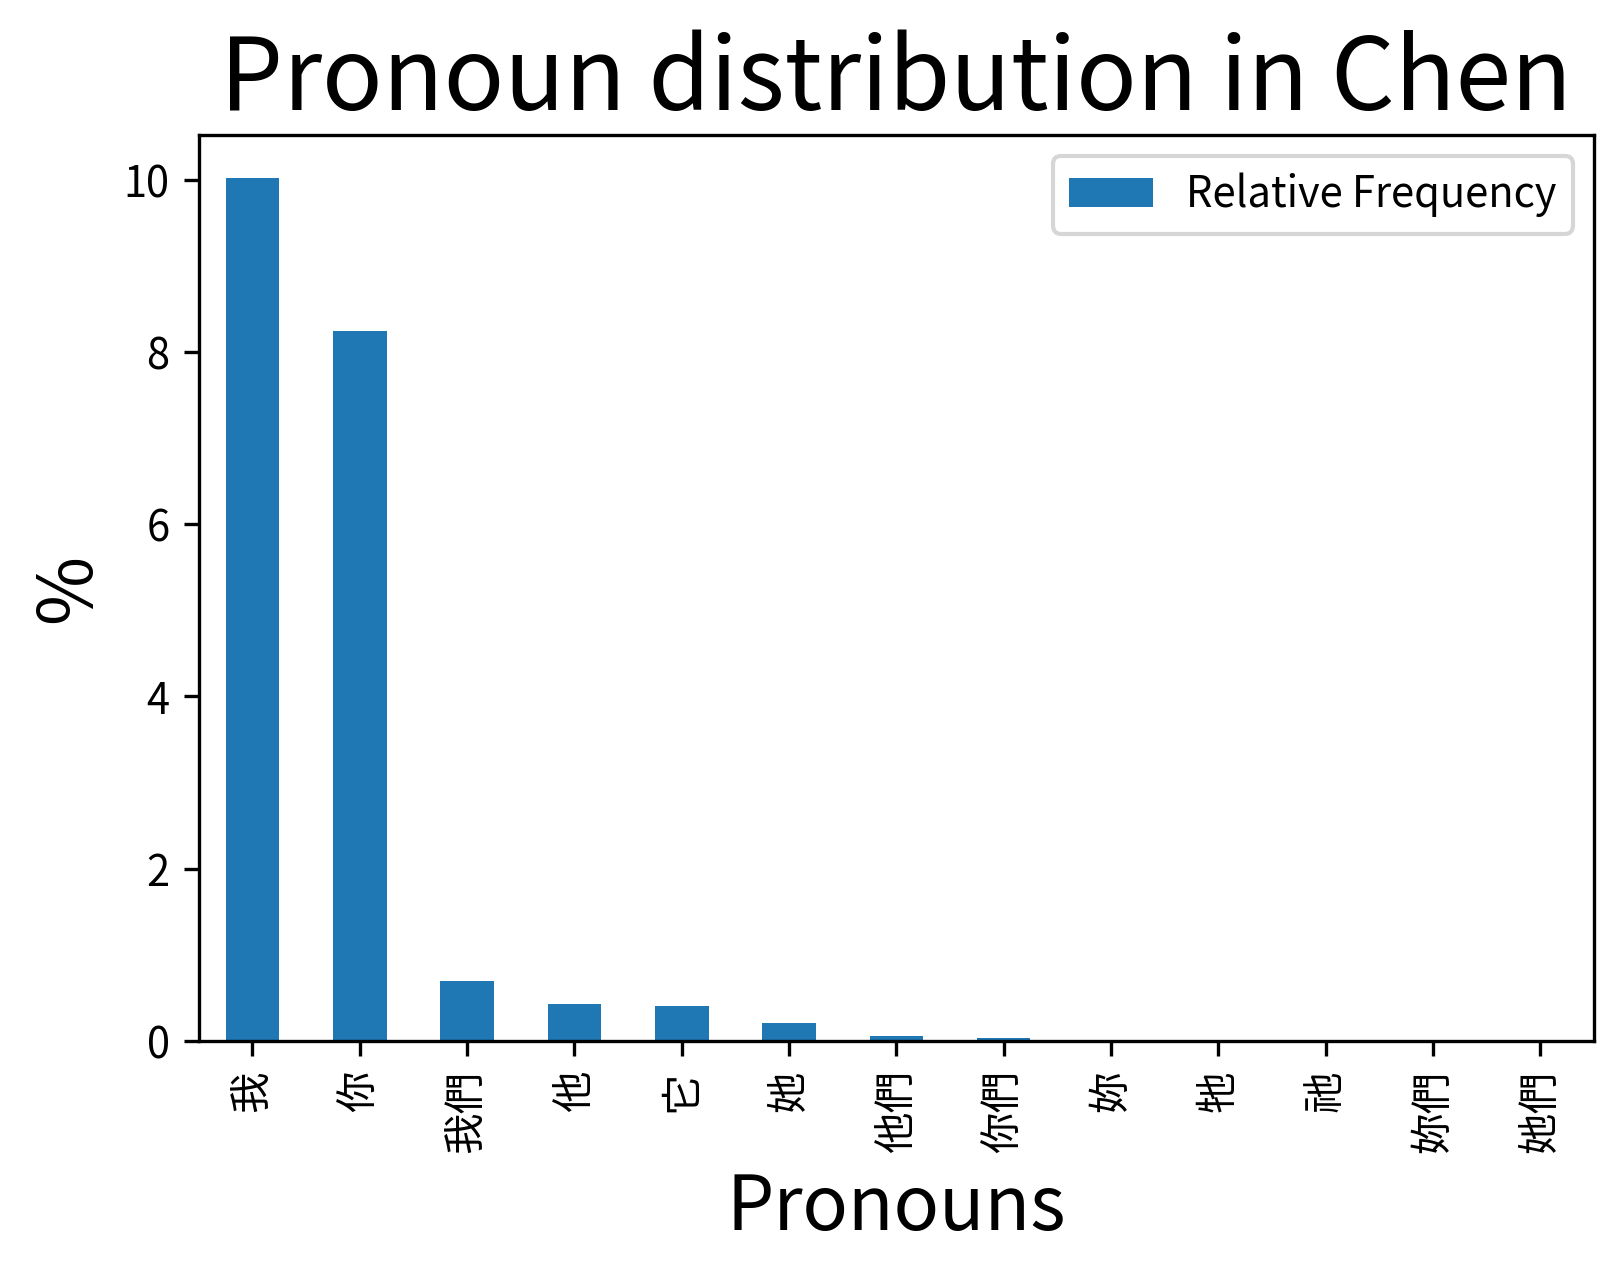

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Pronoun distribution

tgt_pronoun_df.plot.bar(x = "Pronouns", y = 'Relative Frequency')
 
plt.title('Pronoun distribution in Chen', fontsize=24)  
plt.xlabel('Pronouns', fontsize=18)  
plt.ylabel('%', fontsize=18)  

 
plt.savefig('tgt_pronoun_bar.png', dpi=300)
plt.show()
files.download("tgt_pronoun_bar.png")

In [ ]:
pronouns = ["妳","你","我","他","她","它","牠","祂","我們","你們","妳們","他們","她們"]

freq=[]
for i in pronouns:
  count_p = count_freq(ref_corpus)[0].get(i, 0)
  freq.append(count_p)
relative_freq=[]
for i in freq:
  count_re = (i/count_freq(ref_corpus)[2])*100
  relative_freq.append(count_re)
print (freq)
print (relative_freq)


[160, 2525, 2849, 208, 66, 37, 0, 0, 183, 18, 0, 19, 0]
[0.37776833356943856, 5.961656514142702, 6.726637389620816, 0.49109883364027007, 0.1558294375973934, 0.08735892713793265, 0.0, 0.0, 0.4320725315200453, 0.042498937526561836, 0.0, 0.04485998961137083, 0.0]


In [ ]:
import pandas as pd

pronoun_rel_freq = {'Pronouns': pronouns,
        'Relative Frequency': relative_freq
        }

ref_pronoun_df= pd.DataFrame(pronoun_rel_freq, columns = ['Pronouns', 'Relative Frequency'])
ref_pronoun_df = ref_pronoun_df.sort_values(by='Relative Frequency', ascending=False)
print (ref_pronoun_df)


   Pronouns  Relative Frequency
2         我            6.726637
1         你            5.961657
3         他            0.491099
8        我們            0.432073
0         妳            0.377768
4         她            0.155829
5         它            0.087359
11       他們            0.044860
9        你們            0.042499
6         牠            0.000000
7         祂            0.000000
10       妳們            0.000000
12       她們            0.000000


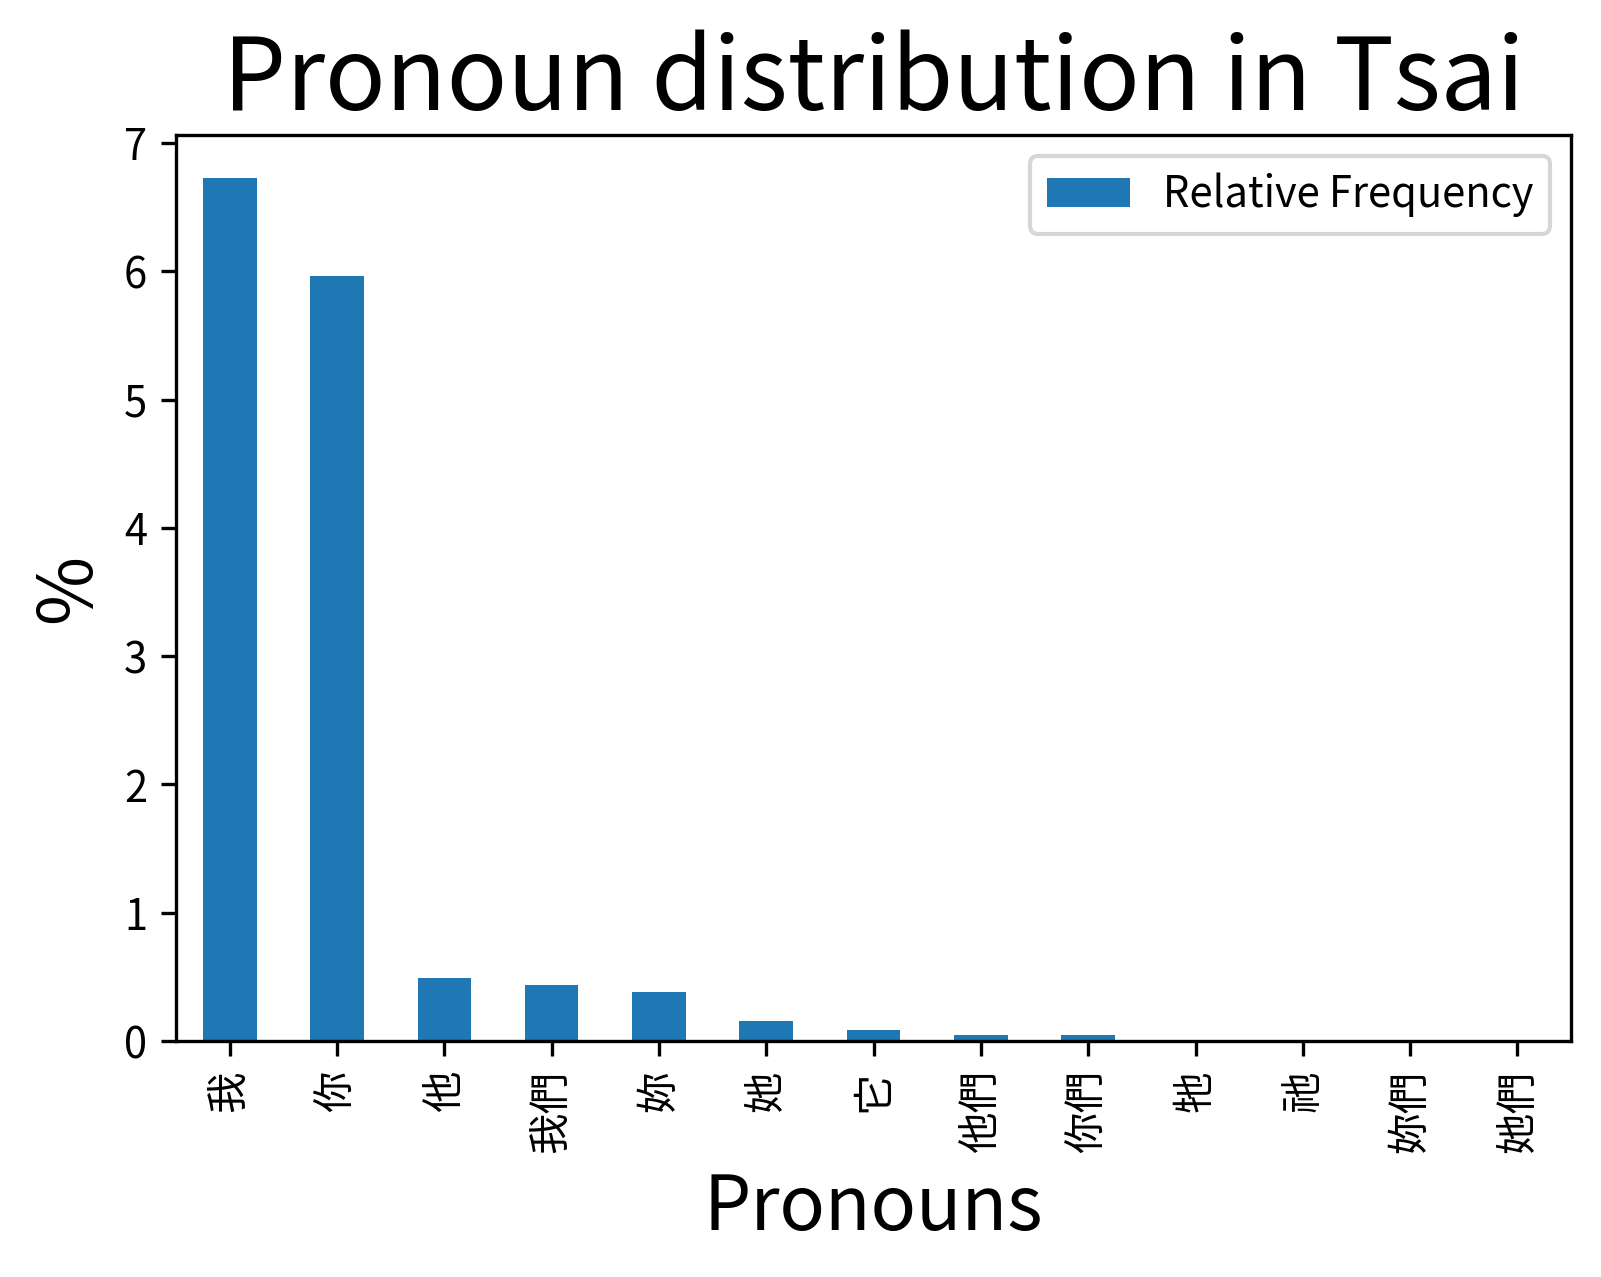

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Pronoun distribution

ref_pronoun_df.plot.bar(x = "Pronouns", y = 'Relative Frequency')
 
plt.title('Pronoun distribution in Tsai', fontsize=24)  
plt.xlabel('Pronouns', fontsize=18)  
plt.ylabel('%', fontsize=18)  

 
plt.savefig('ref_pronoun_bar.png', dpi=300)
plt.show()
files.download("ref_pronoun_bar.png")

In [ ]:
ref_pronoun_df["Singer"] = "Tsai"
tgt_pronoun_df["Singer"] = "Chen"
prodf = ref_pronoun_df.append(tgt_pronoun_df)


In [ ]:
import plotly.express as px
fig = px.bar(prodf, x='Pronouns', y='Relative Frequency',   color="Singer", orientation='v') #log_x=True, size_max=100,
fig.update_layout(title_text='Pronoun Distribution in Tsai and in Chen', title_x=0.5)
fig.show()
 
plt.savefig('pronoun_bar.png', dpi=300)
plt.show()
files.download("pronoun_bar.png")

<Figure size 1800x1200 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>